<a href="https://colab.research.google.com/github/Tom-Jung/testttttt/blob/main/Network_with_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


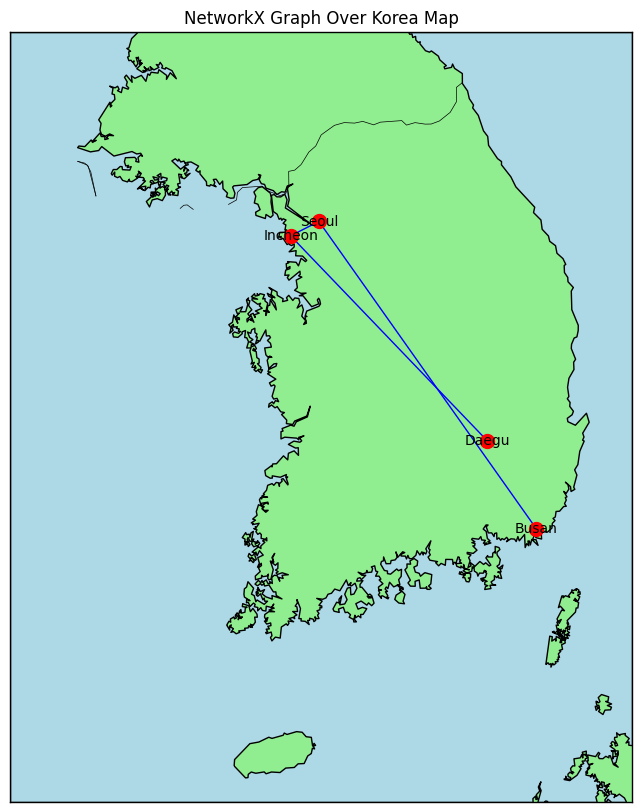

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Step 1: Create a map of Korea
plt.figure(figsize=(10, 10))
korea_map = Basemap(
    projection='merc',
    llcrnrlon=124, llcrnrlat=33, urcrnrlon=130, urcrnrlat=39,
    resolution='i'
)
korea_map.drawcoastlines()
korea_map.drawcountries()
korea_map.drawmapboundary(fill_color='lightblue')
korea_map.fillcontinents(color='lightgreen', lake_color='lightblue')

# Step 2: Define a NetworkX graph with nodes and edges
G = nx.Graph()
nodes = {
    "Seoul": (126.9780, 37.5665),
    "Busan": (129.0756, 35.1796),
    "Incheon": (126.7052, 37.4563),
    "Daegu": (128.6014, 35.8714),
}
edges = [("Seoul", "Busan"), ("Seoul", "Incheon"), ("Incheon", "Daegu")]

# Add nodes to the graph
for city, coord in nodes.items():
    G.add_node(city, pos=coord)

# Add edges to the graph
G.add_edges_from(edges)

# Step 3: Overlay the NetworkX graph on the map
positions = {city: korea_map(*coord) for city, coord in nodes.items()}

# Draw nodes
nx.draw_networkx_nodes(G, pos=positions, node_size=100, node_color="red")

# Draw edges
nx.draw_networkx_edges(G, pos=positions, edge_color="blue")

# Draw labels
nx.draw_networkx_labels(G, pos=positions, font_size=10, font_color="black")

plt.title("NetworkX Graph Over Korea Map")
plt.show()


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
# The following line imports the Basemap class after installation.
from mpl_toolkits.basemap import Basemap


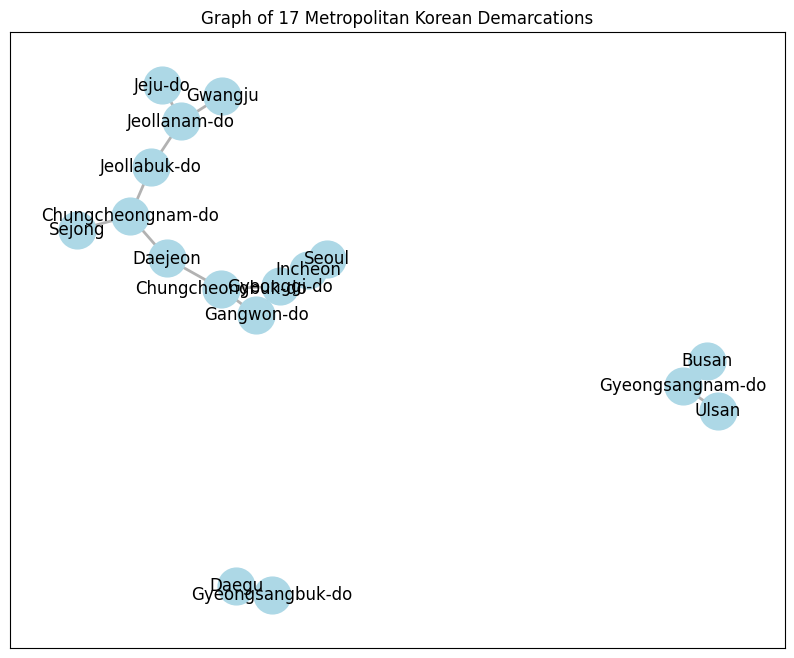

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a Graph
G = nx.Graph()

# List of 17 metropolitan Korean demarcations
metropolitan_areas = [
    "Seoul", "Busan", "Daegu", "Incheon", "Gwangju", "Daejeon", "Ulsan",
    "Sejong", "Gyeonggi-do", "Gangwon-do", "Chungcheongbuk-do",
    "Chungcheongnam-do", "Jeollabuk-do", "Jeollanam-do", "Gyeongsangbuk-do",
    "Gyeongsangnam-do", "Jeju-do"
]

# Add nodes to the graph
G.add_nodes_from(metropolitan_areas)

# Define edges (for example, adjacency or connections between areas)
# This is an arbitrary example. Replace it with actual adjacency data if needed.
edges = [
    ("Seoul", "Incheon"), ("Seoul", "Gyeonggi-do"), ("Busan", "Gyeongsangnam-do"),
    ("Daegu", "Gyeongsangbuk-do"), ("Incheon", "Gyeonggi-do"), ("Gwangju", "Jeollanam-do"),
    ("Daejeon", "Chungcheongnam-do"), ("Daejeon", "Chungcheongbuk-do"),
    ("Ulsan", "Gyeongsangnam-do"), ("Sejong", "Chungcheongnam-do"),
    ("Chungcheongbuk-do", "Gyeonggi-do"), ("Gangwon-do", "Gyeonggi-do"),
    ("Gangwon-do", "Chungcheongbuk-do"), ("Jeollabuk-do", "Chungcheongnam-do"),
    ("Jeollanam-do", "Jeollabuk-do"), ("Jeju-do", "Jeollanam-do")
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# Show the graph
plt.title("Graph of 17 Metropolitan Korean Demarcations")
plt.show()

In [ ]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

# Load Korean map data (replace 'korea_boundary.shp' with the actual file)
file_path = "path_to_your_shapefile_or_geojson"
gdf = gpd.read_file(file_path)

# Simplify the GeoDataFrame to focus on metropolitan boundaries
gdf = gdf[['NAME_1', 'geometry']]  # Adjust 'NAME_1' based on your file's column for metro names

# Build graph from adjacency relationships
G = nx.Graph()

# Add nodes for each metropolitan area
for index, row in gdf.iterrows():
    G.add_node(row['NAME_1'], geometry=row['geometry'])

# Add edges based on shared boundaries
for i, row_i in gdf.iterrows():
    for j, row_j in gdf.iterrows():
        if i < j and row_i['geometry'].touches(row_j['geometry']):
            G.add_edge(row_i['NAME_1'], row_j['NAME_1'])

# Plot the map with graph overlay
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Extract node positions from the centroid of geometries
node_positions = {node: (data['geometry'].centroid.x, data['geometry'].centroid.y)
                  for node, data in G.nodes(data=True)}

# Draw the graph on the map
nx.draw(
    G,
    pos=node_positions,
    ax=ax,
    with_labels=True,
    node_size=100,
    font_size=8,
    node_color='red',
    edge_color='blue'
)

plt.title("NetworkX Graph of South Korea's Metropolitan Boundaries")
plt.show()


In [1]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

# Load Korean map data (replace 'korea_boundary.shp' with the actual file)
file_path = "path_to_your_shapefile_or_geojson"
gdf = gpd.read_file(file_path)

# Simplify the GeoDataFrame to focus on metropolitan boundaries
gdf = gdf[['NAME_1', 'geometry']]  # Adjust 'NAME_1' based on your file's column for metro names

# Build graph from adjacency relationships
G = nx.Graph()

# Add nodes for each metropolitan area
for index, row in gdf.iterrows():
    G.add_node(row['NAME_1'], geometry=row['geometry'])

# Add edges based on shared boundaries
for i, row_i in gdf.iterrows():
    for j, row_j in gdf.iterrows():
        if i < j and row_i['geometry'].touches(row_j['geometry']):
            G.add_edge(row_i['NAME_1'], row_j['NAME_1'])

# Plot the map with graph overlay
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Extract node positions from the centroid of geometries
node_positions = {node: (data['geometry'].centroid.x, data['geometry'].centroid.y)
                  for node, data in G.nodes(data=True)}

# Draw the graph on the map
nx.draw(
    G,
    pos=node_positions,
    ax=ax,
    with_labels=True,
    node_size=100,
    font_size=8,
    node_color='red',
    edge_color='blue'
)

plt.title("NetworkX Graph of South Korea's Metropolitan Boundaries")
plt.show()


DataSourceError: path_to_your_shapefile_or_geojson: No such file or directory

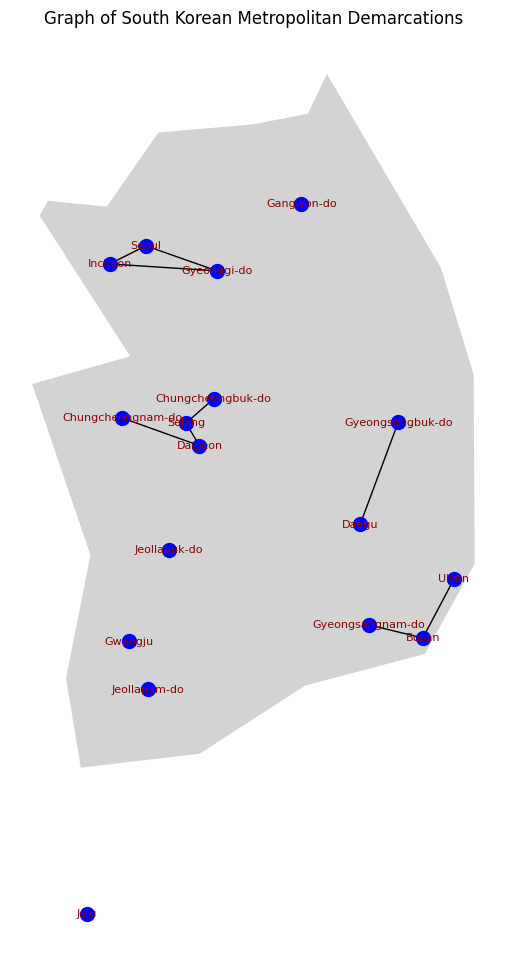

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the path to the shapefile
shapefile_path = '/mnt/data/ne_110m_admin_0_countries.shp'  # Replace with your actual path

# Load the world map and extract South Korea
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')  # Replace with the actual path
south_korea = world[world['ADMIN'] == 'South Korea']

# Define nodes (17 metropolitan areas in South Korea)
nodes = {
    "Seoul": (37.5665, 126.9780),
    "Busan": (35.1796, 129.0756),
    "Daegu": (35.8714, 128.6014),
    "Incheon": (37.4563, 126.7052),
    "Gwangju": (35.1595, 126.8526),
    "Daejeon": (36.3504, 127.3845),
    "Ulsan": (35.5384, 129.3114),
    "Sejong": (36.4875, 127.2818),
    "Gyeonggi-do": (37.4138, 127.5183),
    "Gangwon-do": (37.8228, 128.1555),
    "Chungcheongbuk-do": (36.6350, 127.4914),
    "Chungcheongnam-do": (36.5184, 126.8000),
    "Jeollabuk-do": (35.7175, 127.1530),
    "Jeollanam-do": (34.8679, 126.9910),
    "Gyeongsangbuk-do": (36.4919, 128.8889),
    "Gyeongsangnam-do": (35.2599, 128.6649),
    "Jeju": (33.4996, 126.5312),
}

# Create a graph and add nodes with positions
G = nx.Graph()
for city, coords in nodes.items():
    G.add_node(city, pos=(coords[1], coords[0]))  # Swap lat/lon to match map projection

# Example edges based on adjacency
edges = [
    ("Seoul", "Incheon"),
    ("Seoul", "Gyeonggi-do"),
    ("Incheon", "Gyeonggi-do"),
    ("Busan", "Ulsan"),
    ("Busan", "Gyeongsangnam-do"),
    ("Daegu", "Gyeongsangbuk-do"),
    ("Daejeon", "Chungcheongnam-do"),
    ("Daejeon", "Sejong"),
    ("Sejong", "Chungcheongbuk-do"),
]

G.add_edges_from(edges)

# Extract positions for plotting
positions = nx.get_node_attributes(G, 'pos')

# Plot map and graph
fig, ax = plt.subplots(figsize=(12, 12))
south_korea.plot(ax=ax, color='lightgrey')

# Draw the graph
nx.draw(
    G, pos=positions, ax=ax,
    node_size=100, node_color='blue', edge_color='black',
    with_labels=True, font_size=8, font_color='darkred'
)

plt.title("Graph of South Korean Metropolitan Demarcations")
plt.show()


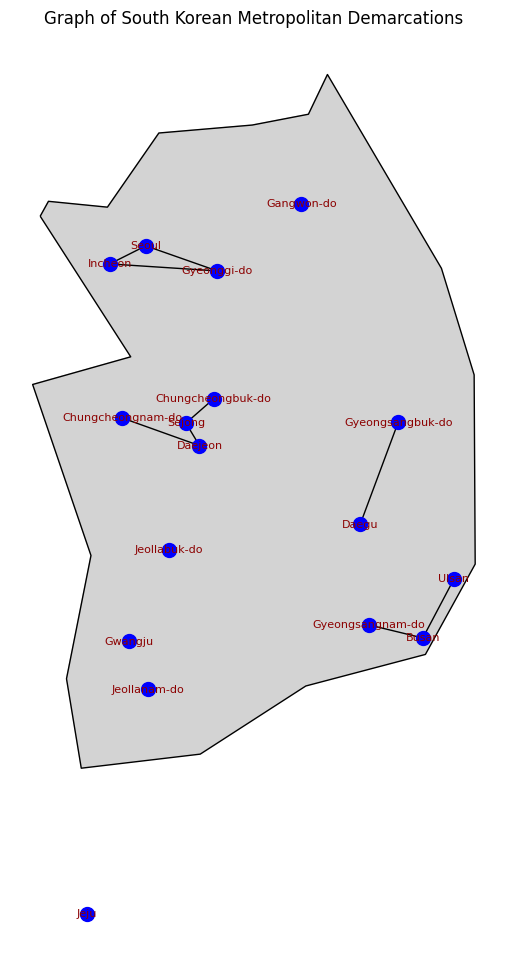

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the path to the shapefile
shapefile_path = '/mnt/data/ne_110m_admin_0_countries.shp'  # Replace with your actual path

# Load the world map and extract South Korea
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')  # Replace with the actual path
south_korea = world[world['ADMIN'] == 'South Korea']

# Define nodes (17 metropolitan areas in South Korea)
nodes = {
    "Seoul": (37.5665, 126.9780),
    "Busan": (35.1796, 129.0756),
    "Daegu": (35.8714, 128.6014),
    "Incheon": (37.4563, 126.7052),
    "Gwangju": (35.1595, 126.8526),
    "Daejeon": (36.3504, 127.3845),
    "Ulsan": (35.5384, 129.3114),
    "Sejong": (36.4875, 127.2818),
    "Gyeonggi-do": (37.4138, 127.5183),
    "Gangwon-do": (37.8228, 128.1555),
    "Chungcheongbuk-do": (36.6350, 127.4914),
    "Chungcheongnam-do": (36.5184, 126.8000),
    "Jeollabuk-do": (35.7175, 127.1530),
    "Jeollanam-do": (34.8679, 126.9910),
    "Gyeongsangbuk-do": (36.4919, 128.8889),
    "Gyeongsangnam-do": (35.2599, 128.6649),
    "Jeju": (33.4996, 126.5312),
}

# Create a graph and add nodes with positions
G = nx.Graph()
for city, coords in nodes.items():
    G.add_node(city, pos=(coords[1], coords[0]))  # Swap lat/lon to match map projection

# Example edges based on adjacency
edges = [
    ("Seoul", "Incheon"),
    ("Seoul", "Gyeonggi-do"),
    ("Incheon", "Gyeonggi-do"),
    ("Busan", "Ulsan"),
    ("Busan", "Gyeongsangnam-do"),
    ("Daegu", "Gyeongsangbuk-do"),
    ("Daejeon", "Chungcheongnam-do"),
    ("Daejeon", "Sejong"),
    ("Sejong", "Chungcheongbuk-do"),
]

G.add_edges_from(edges)

# Extract positions for plotting
positions = nx.get_node_attributes(G, 'pos')

# Plot map and graph
fig, ax = plt.subplots(figsize=(12, 12))
south_korea.plot(ax=ax, color='lightgrey')  # Plot South Korea map
south_korea.plot(ax=ax, color='lightgrey', edgecolor='black')

# Draw the graph
nx.draw(
    G, pos=positions, ax=ax,
    node_size=100, node_color='blue', edge_color='black',
    with_labels=True, font_size=8, font_color='darkred'
)

plt.title("Graph of South Korean Metropolitan Demarcations")
plt.show()


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the path to the shapefile
shapefile_path = '/mnt/data/ne_110m_admin_0_countries.shp'  # Replace with your actual path

# Load the world map and extract South Korea
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')  # Replace with the actual path
south_korea = world[world['ADMIN'] == 'South Korea']

In [18]:
south_korea

featurecla  scalerank  LABELRANK   SOVEREIGNT SOV_A3  ADM0_DIF  \
96  Admin-0 country          1          2  South Korea    KOR         0   

    LEVEL               TYPE TLC        ADMIN  ... FCLASS_TR  FCLASS_ID  \
96      2  Sovereign country   1  South Korea  ...      None       None   

   FCLASS_PL FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
96      None      None       None      None      None       None      None   

                                             geometry  
96  POLYGON ((126.17476 37.74969, 126.23734 37.840...  

[1 rows x 169 columns]

In [8]:
south_korea

featurecla  scalerank  LABELRANK   SOVEREIGNT SOV_A3  ADM0_DIF  \
96  Admin-0 country          1          2  South Korea    KOR         0   

    LEVEL               TYPE TLC        ADMIN  ... FCLASS_TR  FCLASS_ID  \
96      2  Sovereign country   1  South Korea  ...      None       None   

   FCLASS_PL FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
96      None      None       None      None      None       None      None   

                                             geometry  
96  POLYGON ((126.17476 37.74969, 126.23734 37.840...  

[1 rows x 169 columns]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

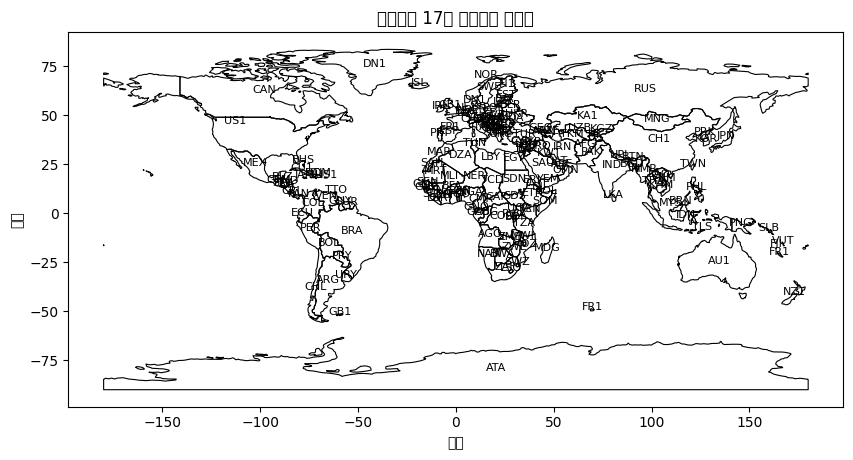

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Shapefile 또는 GeoJSON 파일 경로 (파일 경로를 적절히 변경하세요)
shapefile_path = "/content/ne_110m_admin_0_countries.shp"

# GeoDataFrame으로 데이터 로드
gdf = gpd.read_file(shapefile_path)
gdf = gdf.to_crs(epsg=4326)

# 지도 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, color="black", linewidth=0.8)

for idx, row in gdf.iterrows():
    ax.annotate(text=row['SOV_A3'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                ha='center', fontsize=8)

# 제목과 레이블 설정
ax.set_title("대한민국 17개 광역시도 경계선")
ax.set_xlabel("경도")
ax.set_ylabel("위도")

plt.show()


In [12]:
gdf

featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      FJI         0      2  Sovereign country   1   
1      TZA         0      2  Sovereign country   1   
2      SAH         0      2      Indeterminate   1   
3      CAN         0      2  Sovereign country   1   
4      US1         1      2            Country   1   
..     ...       ...    ...                ...  ..   
172    SRB         0      2  Sovereign country   1   
173    MNE         0      2  Sovereign country   1   
174    KOS         0      2           Disputed   1   
175    TTO         0      2  Sovereign country   1   
176    SDS         0      2  Sovereign country   1   

                           ADMIN  ...        FCLASS_TR     FCLASS_ID  \
0                           Fiji  ...             None          None   
1    United Republic of Tanzania  ...             None          None   
2                 Western Sahara  ...     Unrecognized  Unrecognized   
3                         Canada  ...             None          None   
4       United States of America  ...             None          None   
..                           ...  ...              ...           ...   
172           Republic of Serbia  ...             None          None   
173                   Montenegro  ...             None          None   
174                       Kosovo  ...  Admin-0 country  Unrecognized   
175          Trinidad and Tobago  ...             None          None   
176                  South Sudan  ...             None          None   

           FCLASS_PL     FCLASS_GR        FCLASS_IT        FCLASS_NL  \
0               None          None             None             None   
1               None          None             None             None   
2       Unrecognized          None             None     Unrecognized   
3               None          None             None             None   
4               None          None             None             None   
..               ...           ...              ...              ...   
172             None          None             None             None   
173             None          None             None             None   
174  Admin-0 country  Unrecognized  Admin-0 country  Admin-0 country   
175             None          None             None             None   
176             None          None             None             None   

           FCLASS_SE        FCLASS_BD     FCLASS_UA  \
0               None             None          None   
1               None             None          None   
2               None             None          None   
3               None             None          None   
4               None             None          None   
..               ...              ...           ...   
172             None             None          None   
173             None             None          None   
174  Admin-0 country  Admin-0 country  Unrecognized   
175             None             None          None   
176             None             None          None   

                                              geometry  
0    MULTIPO

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Shapefile 또는 GeoJSON 파일 경로 (파일 경로를 적절히 변경하세요)
shapefile_path = "/content/ne_110m_admin_0_countries.shp"

# GeoDataFrame으로 데이터 로드
gdf = gpd.read_file(shapefile_path)

In [15]:
gdf

featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      FJI         0      2  Sovereign country   1   
1      TZA         0      2  Sovereign country   1   
2      SAH         0      2      Indeterminate   1   
3      CAN         0      2  Sovereign country   1   
4      US1         1      2            Country   1   
..     ...       ...    ...                ...  ..   
172    SRB         0      2  Sovereign country   1   
173    MNE         0      2  Sovereign country   1   
174    KOS         0      2           Disputed   1   
175    TTO         0      2  Sovereign country   1   
176    SDS         0      2  Sovereign country   1   

                           ADMIN  ...        FCLASS_TR     FCLASS_ID  \
0                           Fiji  ...             None          None   
1    United Republic of Tanzania  ...             None          None   
2                 Western Sahara  ...     Unrecognized  Unrecognized   
3                         Canada  ...             None          None   
4       United States of America  ...             None          None   
..                           ...  ...              ...           ...   
172           Republic of Serbia  ...             None          None   
173                   Montenegro  ...             None          None   
174                       Kosovo  ...  Admin-0 country  Unrecognized   
175          Trinidad and Tobago  ...             None          None   
176                  South Sudan  ...             None          None   

           FCLASS_PL     FCLASS_GR        FCLASS_IT        FCLASS_NL  \
0               None          None             None             None   
1               None          None             None             None   
2       Unrecognized          None             None     Unrecognized   
3               None          None             None             None   
4               None          None             None             None   
..               ...           ...              ...              ...   
172             None          None             None             None   
173             None          None             None             None   
174  Admin-0 country  Unrecognized  Admin-0 country  Admin-0 country   
175             None          None             None             None   
176             None          None             None             None   

           FCLASS_SE        FCLASS_BD     FCLASS_UA  \
0               None             None          None   
1               None             None          None   
2               None             None          None   
3               None             None          None   
4               None             None          None   
..               ...              ...           ...   
172             None             None          None   
173             None             None          None   
174  Admin-0 country  Admin-0 country  Unrecognized   
175             None             None          None   
176             None             None          None   

                                              geometry  
0    MULTIPO

In [19]:
import folium
import requests

# GeoJSON 데이터 URL
geojson_url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea-provinces-2013.geojson"

# GeoJSON 데이터 로드
response = requests.get(geojson_url)
geojson_data = response.json()

# 지도 생성 (중심점: 서울, 적절한 줌 레벨 설정)
map_korea = folium.Map(location=[37.5665, 126.9780], zoom_start=7)

# GeoJSON 데이터를 지도에 추가
folium.GeoJson(
    geojson_data,
    name="geojson",
    style_function=lambda feature: {
        "fillColor": "rgba(0,0,0,0)",
        "color": "blue",  # 경계선 색상
        "weight": 2,  # 경계선 두께
    }
).add_to(map_korea)

# 지도 출력
map_korea.save("korea_province_boundaries.html")


JSONDecodeError: Extra data: line 1 column 4 (char 3)

In [20]:
import folium
import requests

# GeoJSON 데이터 URL
geojson_url = "/content/TL_SCCO_CTPRVN.json"

# GeoJSON 데이터 로드
response = requests.get(geojson_url)

In [21]:
response

<Response [404]>

In [22]:
import folium
import geopandas as gpd

# GeoJSON 데이터 파일 경로 (미리 준비한 데이터)
geojson_file = "korea_sido.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# Folium 지도 생성 (대한민국 중앙 좌표 기준)
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# GeoJSON 데이터를 Folium 지도에 추가
folium.GeoJson(
    gdf,
    name="광역시도 경계선",
    style_function=lambda x: {
        "fillColor": "blue",
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.1
    },
).add_to(m)

# 지도에 Layer Control 추가
folium.LayerControl().add_to(m)

# HTML 파일로 저장
m.save("korea_boundary_map.html")


DataSourceError: korea_sido.json: No such file or directory

In [23]:
import folium
import geopandas as gpd

# GeoJSON 데이터 파일 경로 (미리 준비한 데이터)
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# Folium 지도 생성 (대한민국 중앙 좌표 기준)
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# GeoJSON 데이터를 Folium 지도에 추가
folium.GeoJson(
    gdf,
    name="광역시도 경계선",
    style_function=lambda x: {
        "fillColor": "blue",
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.1
    },
).add_to(m)

# 지도에 Layer Control 추가
folium.LayerControl().add_to(m)

# HTML 파일로 저장
m.save("korea_boundary_map.html")


In [24]:
m

In [31]:
import folium
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 광역시도의 중심 좌표 계산 (geometry의 중심점)
gdf["center"] = gdf.geometry.centroid
centers = gdf[["center", "geometry"]].copy()
centers["lat"] = centers.center.y
centers["lon"] = centers.center.x

# Folium 지도 생성 (대한민국 중앙 좌표 기준)
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# GeoJSON 데이터를 Folium 지도에 추가
folium.GeoJson(
    gdf,
    name="광역시도 경계선",
    style_function=lambda x: {
        "fillColor": "blue",
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.1
    },
).add_to(m)

# NetworkX 그래프 생성
G = nx.Graph()

# 노드 추가 (광역시도 이름과 좌표)
for _, row in centers.iterrows():
    G.add_node(row["name"], pos=(row["lat"], row["lon"]))

# 예시 간선 추가 (랜덤 연결, 실제 연결은 데이터에 따라 다름)
edges = [("서울", "인천"), ("서울", "경기"), ("부산", "울산"), ("대구", "경북")]
G.add_edges_from(edges)

# Folium에 NetworkX 그래프 추가
for node, data in G.nodes(data=True):
    folium.Marker(
        location=(data["pos"][0], data["pos"][1]),
        popup=node,
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

for edge in G.edges():
    node1, node2 = edge
    loc1 = G.nodes[node1]["pos"]
    loc2 = G.nodes[node2]["pos"]
    folium.PolyLine(
        locations=[(loc1[0], loc1[1]), (loc2[0], loc2[1])],
        color="green",
        weight=2
    ).add_to(m)

# 지도에 Layer Control 추가
folium.LayerControl().add_to(m)

# HTML 파일로 저장
m.save("korea_network_map.html")


<ipython-input-31-5424f4911fae>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["center"] = gdf.geometry.centroid


TypeError: Object of type Point is not JSON serializable

In [28]:
gdf

CTPRVN_CD         CTP_ENG_NM CTP_KOR_NM  \
0         42         Gangwon-do        강원도   
1         41        Gyeonggi-do        경기도   
2         48   Gyeongsangnam-do       경상남도   
3         47   Gyeongsangbuk-do       경상북도   
4         29            Gwangju      광주광역시   
5         27              Daegu      대구광역시   
6         30            Daejeon      대전광역시   
7         26              Busan      부산광역시   
8         11              Seoul      서울특별시   
9         36          Sejong-si    세종특별자치시   
10        31              Ulsan      울산광역시   
11        28            Incheon      인천광역시   
12        46        Jellanam-do       전라남도   
13        45       Jeollabuk-do       전라북도   
14        50            Jeju-do    제주특별자치도   
15        44  Chungcheongnam-do       충청남도   
16        43  Chungcheongbuk-do       충청북도   

                                             geometry  \
0   POLYGON ((128.54881 38.30195, 128.56009 38.257...   
1   POLYGON ((127.11055 38.24157, 127.14734 38.241...   
2   POLYGON ((128.23751 34.83847, 128.26501 34.818...   
3   POLYGON ((129.57892 36.05176, 129.57496 36.004...   
4   POLYGON ((126.76105 35.25857, 126.76118 35.258...   
5   POLYGON ((128.72133 36.00636, 128.72189 36.006...   
6   POLYGON ((127.40151 36.4868, 127.40237 36.4860...   
7   POLYGON ((128.82866 35.08993, 128.8509 35.0420...   
8   POLYGON ((127.12449 37.46664, 127.12421 37.466...   
9   POLYGON ((127.20794 36.71919, 127.20793 36.719...   
10  POLYGON ((129.3464 35.46496, 129.35405 35.3928...   
11  POLYGON ((126.62944 37.49963, 126.60313 37.513...   
12  POLYGON ((125.10885 34.09273, 125.14328 34.052...   
13  POLYGON ((126.40663 35.80938, 126.40663 35.809...   
14  POLYGON ((126.76811 33.56416, 126.80811 33.556...   
15  POLYGON ((126.37136 36.56593, 126.39888 36.488...   
16  POLYGON ((128.21207 37.24538, 128.21311 37.245...   

                        center  
0   POINT (128.30064 37.71857)  
1   POINT (127.17994 37.53346)  
2    POINT (128.25869 35.3318)  
3   POINT (128.73203 36.33972)  
4   POINT (126.83353 35.15549)  
5   POINT (128.56503 35.82967)  
6   POINT (127.39737 36.34131)  
7   POINT (129.07647 35.21378)  
8    POINT (126.9939 37.55192)  
9   POINT (127.25863 36.56061)  
10   POINT (129.2376 35.55486)  
11  POINT (125.65849 37.89012)  
12  POINT (126.90199 34.91066)  
13   POINT (127.10576 35.7237)  
14  POINT (126.55341 33.38407)  
15  POINT (126.86855 36.52844)  
16  POINT (127.83251 36.73937)

In [32]:
import folium
import geopandas as gpd
import networkx as nx

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 광역시도의 중심 좌표 계산 (geometry의 중심점)
gdf["center"] = gdf.geometry.centroid
gdf["lat"] = gdf["center"].y
gdf["lon"] = gdf["center"].x

# Folium 지도 생성 (대한민국 중앙 좌표 기준)
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# GeoJSON 데이터를 Folium 지도에 추가
folium.GeoJson(
    gdf,
    name="광역시도 경계선",
    style_function=lambda x: {
        "fillColor": "blue",
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.1
    },
).add_to(m)

# NetworkX 그래프 생성
G = nx.Graph()

# 노드 추가 (광역시도 이름과 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["name"], pos=(row["lat"], row["lon"]))

# 예시 간선 추가 (랜덤 연결, 실제 연결은 데이터에 따라 다름)
edges = [("서울특별시", "인천광역시"), ("서울특별시", "경기도"), ("부산광역시", "울산광역시"), ("대구광역시", "경상북도")]
G.add_edges_from(edges)

# Folium에 NetworkX 그래프 추가
for node, data in G.nodes(data=True):
    folium.Marker(
        location=(data["pos"][0], data["pos"][1]),
        popup=node,
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

for edge in G.edges():
    node1, node2 = edge
    loc1 = G.nodes[node1]["pos"]
    loc2 = G.nodes[node2]["pos"]
    folium.PolyLine(
        locations=[(loc1[0], loc1[1]), (loc2[0], loc2[1])],
        color="green",
        weight=2
    ).add_to(m)

# 지도에 Layer Control 추가
folium.LayerControl().add_to(m)

# HTML 파일로 저장
m.save("korea_network_map.html")


<ipython-input-32-52ca223a0a3f>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["center"] = gdf.geometry.centroid


TypeError: Object of type Point is not JSON serializable

In [ ]:
/content/TL_SCCO_CTPRVN.json

In [33]:
import folium
import geopandas as gpd
import networkx as nx

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 광역시도의 중심 좌표 계산 (geometry의 중심점)
gdf["center"] = gdf.geometry.centroid
gdf["lat"] = gdf["center"].y
gdf["lon"] = gdf["center"].x

# Folium 지도 생성 (대한민국 중앙 좌표 기준)
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# GeoJSON 데이터를 Folium 지도에 추가
folium.GeoJson(
    gdf,
    name="광역시도 경계선",
    style_function=lambda x: {
        "fillColor": "blue",
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.1
    },
).add_to(m)

# NetworkX 그래프 생성
G = nx.Graph()

# 노드 추가 (광역시도 이름과 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["name"], pos=(row["lat"], row["lon"]))

# 예시 간선 추가 (랜덤 연결, 실제 연결은 데이터에 따라 다름)
edges = [("서울특별시", "인천광역시"), ("서울특별시", "경기도"), ("부산광역시", "울산광역시"), ("대구광역시", "경상북도")]
G.add_edges_from(edges)

# Folium에 NetworkX 그래프 추가
for node, data in G.nodes(data=True):
    folium.Marker(
        location=(data["pos"][0], data["pos"][1]),
        popup=node,
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

for edge in G.edges():
    node1, node2 = edge
    loc1 = G.nodes[node1]["pos"]
    loc2 = G.nodes[node2]["pos"]
    folium.PolyLine(
        locations=[(loc1[0], loc1[1]), (loc2[0], loc2[1])],
        color="green",
        weight=2
    ).add_to(m)

# 지도에 Layer Control 추가
folium.LayerControl().add_to(m)

# HTML 파일로 저장
m.save("korea_network_map.html")


<ipython-input-33-52ca223a0a3f>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["center"] = gdf.geometry.centroid


TypeError: Object of type Point is not JSON serializable

In [35]:
import folium
import geopandas as gpd
import networkx as nx

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 저장 (lat, lon 형태로)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Folium 지도 생성 (대한민국 중앙 좌표 기준)
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# GeoJSON 데이터를 Folium 지도에 추가
folium.GeoJson(
    gdf,
    name="광역시도 경계선",
    style_function=lambda x: {
        "fillColor": "blue",
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.1
    },
).add_to(m)

# NetworkX 그래프 생성
G = nx.Graph()

# 노드 추가 (광역시도 이름과 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lat"], row["lon"]))

# 예시 간선 추가 (랜덤 연결, 실제 연결은 데이터에 따라 다름)
edges = [("서울특별시", "인천광역시"), ("서울특별시", "경기도"), ("부산광역시", "울산광역시"), ("대구광역시", "경상북도")]
G.add_edges_from(edges)

# Folium에 NetworkX 그래프 추가
for node, data in G.nodes(data=True):
    folium.Marker(
        location=(data["pos"][0], data["pos"][1]),
        popup=node,
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

for edge in G.edges():
    node1, node2 = edge
    loc1 = G.nodes[node1]["pos"]
    loc2 = G.nodes[node2]["pos"]
    folium.PolyLine(
        locations=[(loc1[0], loc1[1]), (loc2[0], loc2[1])],
        color="green",
        weight=2
    ).add_to(m)

# 지도에 Layer Control 추가
folium.LayerControl().add_to(m)

# HTML 파일로 저장
m.save("korea_network_map.html")


<ipython-input-35-e325074d75a6>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-35-e325074d75a6>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x


<ipython-input-42-2aa07a216c7b>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-42-2aa07a216c7b>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48124

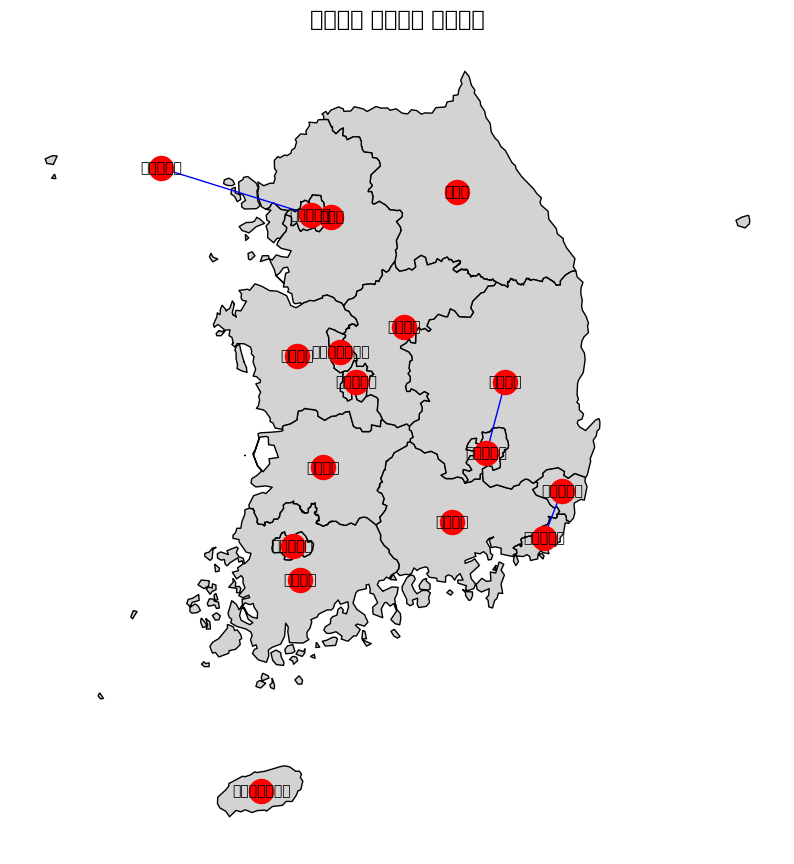

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# NetworkX 그래프 생성
G = nx.Graph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 예시 간선 추가 (랜덤 연결, 실제 연결은 데이터에 따라 다름)
edges = [("서울특별시", "인천광역시"), ("서울특별시", "경기도"),
         ("부산광역시", "울산광역시"), ("대구광역시", "경상북도")]
G.add_edges_from(edges)

# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=300,
    node_color="red",
    edge_color="blue",
    font_size=10,
    font_color="black",
)

# 제목 추가
plt.title("대한민국 광역시도 네트워크", fontsize=16)

# 시각화
plt.show()


<ipython-input-44-b9b0db90ca40>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-44-b9b0db90ca40>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48124

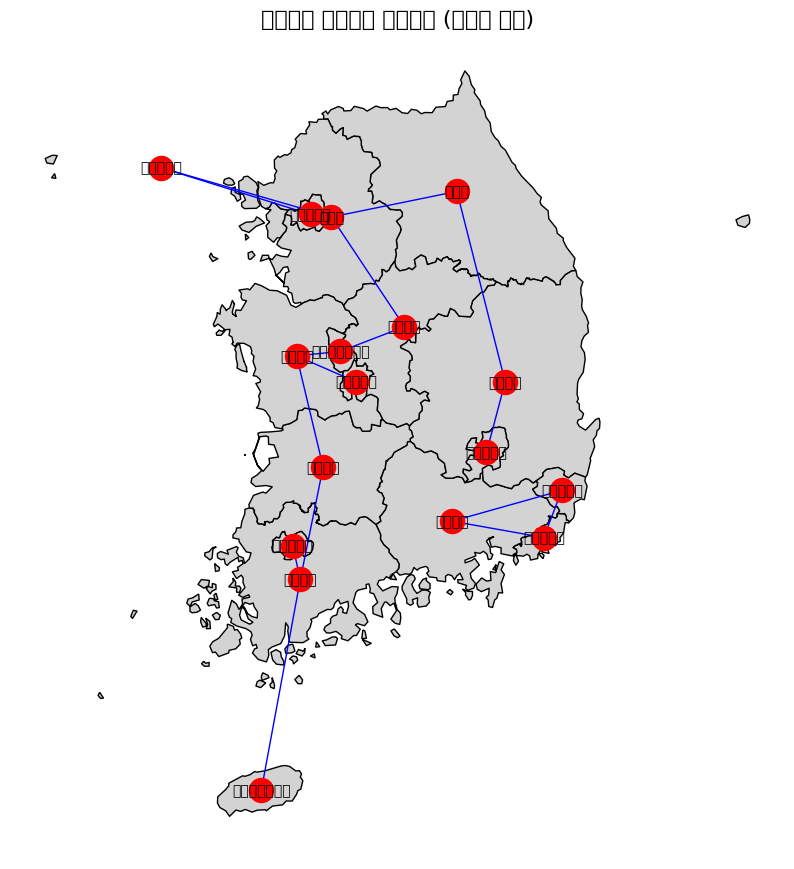

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# NetworkX 그래프 생성
G = nx.Graph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 확장된 간선 (Edges) 추가
edges = [
    ("서울특별시", "인천광역시"), ("서울특별시", "경기도"),
    ("부산광역시", "울산광역시"), ("대구광역시", "경상북도"),
    ("광주광역시", "전라남도"), ("대전광역시", "충청남도"),
    ("세종특별자치시", "충청북도"), ("세종특별자치시", "충청남도"),
    ("경기도", "강원도"), ("경기도", "충청북도"),
    ("강원도", "경상북도"), ("전라북도", "전라남도"),
    ("전라북도", "충청남도"), ("제주특별자치도", "전라남도"),
    ("인천광역시", "경기도"), ("울산광역시", "경상남도"),
    ("경상남도", "부산광역시"), ("경상북도", "강원도")
]
G.add_edges_from(edges)

# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=300,
    node_color="red",
    edge_color="blue",
    font_size=10,
    font_color="black",
)

# 제목 추가
plt.title("대한민국 광역시도 네트워크 (확장된 연결)", fontsize=16)

# 시각화
plt.show()


<ipython-input-47-da642dc36f31>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-47-da642dc36f31>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48124

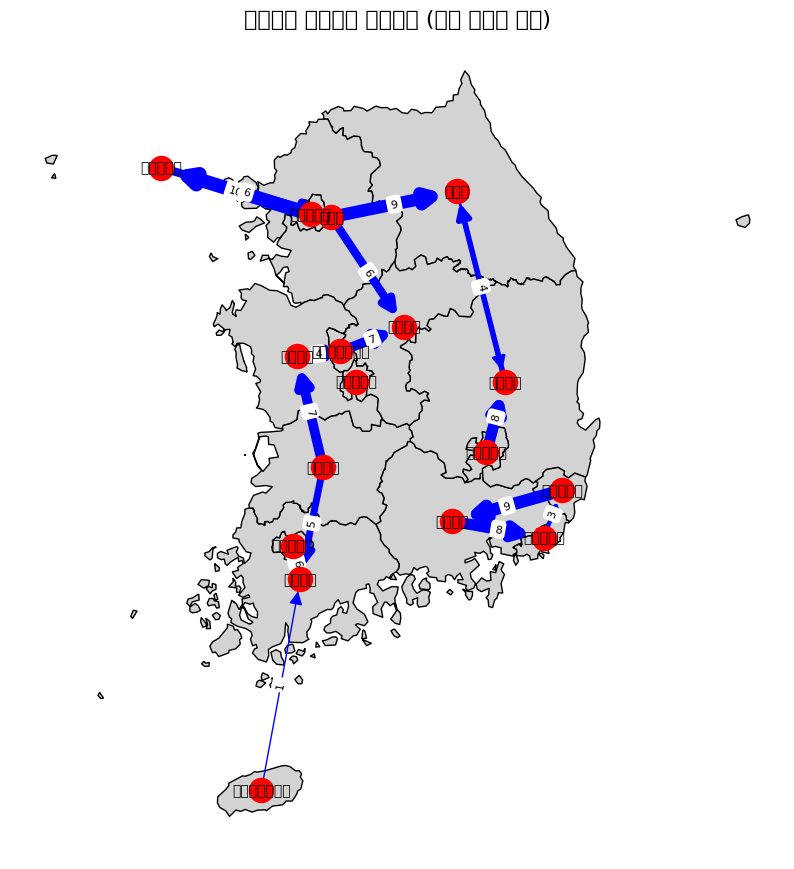

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
edges = [
    ("서울특별시", "인천광역시", {"weight": 10}),   # 서울 -> 인천 (중요도 10)
    ("서울특별시", "경기도", {"weight": 5}),       # 서울 -> 경기 (중요도 5)
    ("부산광역시", "울산광역시", {"weight": 3}),    # 부산 -> 울산 (중요도 3)
    ("대구광역시", "경상북도", {"weight": 8}),     # 대구 -> 경북 (중요도 8)
    ("광주광역시", "전라남도", {"weight": 6}),    # 광주 -> 전남 (중요도 6)
    ("세종특별자치시", "충청북도", {"weight": 7}),  # 세종 -> 충북 (중요도 7)
    ("세종특별자치시", "충청남도", {"weight": 4}),  # 세종 -> 충남 (중요도 4)
    ("경기도", "강원도", {"weight": 9}),         # 경기 -> 강원 (중요도 9)
    ("경기도", "충청북도", {"weight": 6}),       # 경기 -> 충북 (중요도 6)
    ("강원도", "경상북도", {"weight": 2}),       # 강원 -> 경북 (중요도 2)
    ("전라북도", "전라남도", {"weight": 5}),      # 전북 -> 전남 (중요도 5)
    ("전라북도", "충청남도", {"weight": 7}),       # 전북 -> 충남 (중요도 7)
    ("제주특별자치도", "전라남도", {"weight": 1}), # 제주 -> 전남 (중요도 1)
    ("인천광역시", "경기도", {"weight": 6}),        # 인천 -> 경기 (중요도 6)
    ("울산광역시", "경상남도", {"weight": 9}),      # 울산 -> 경남 (중요도 9)
    ("경상남도", "부산광역시", {"weight": 8}),     # 경남 -> 부산 (중요도 8)
    ("경상북도", "강원도", {"weight": 4})        # 경북 -> 강원 (중요도 4)
]

# 간선 추가 (가중치 포함)
G.add_edges_from(edges)

# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")

# 간선 가중치를 기반으로 시각화하기
edge_weights = nx.get_edge_attributes(G, 'weight')

# 간선의 두께를 가중치에 따라 설정
edges_thickness = [edge_weights[edge] for edge in G.edges()]

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=300,
    node_color="red",
    edge_color="blue",
    font_size=10,
    font_color="black",
    arrowsize=20,  # 화살표 크기 설정
    width=edges_thickness  # 가중치에 따른 간선 두께 설정
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("대한민국 광역시도 네트워크 (간선 가중치 포함)", fontsize=16)

# 시각화
plt.show()


<ipython-input-49-c598f46e82d0>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-49-c598f46e82d0>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48124

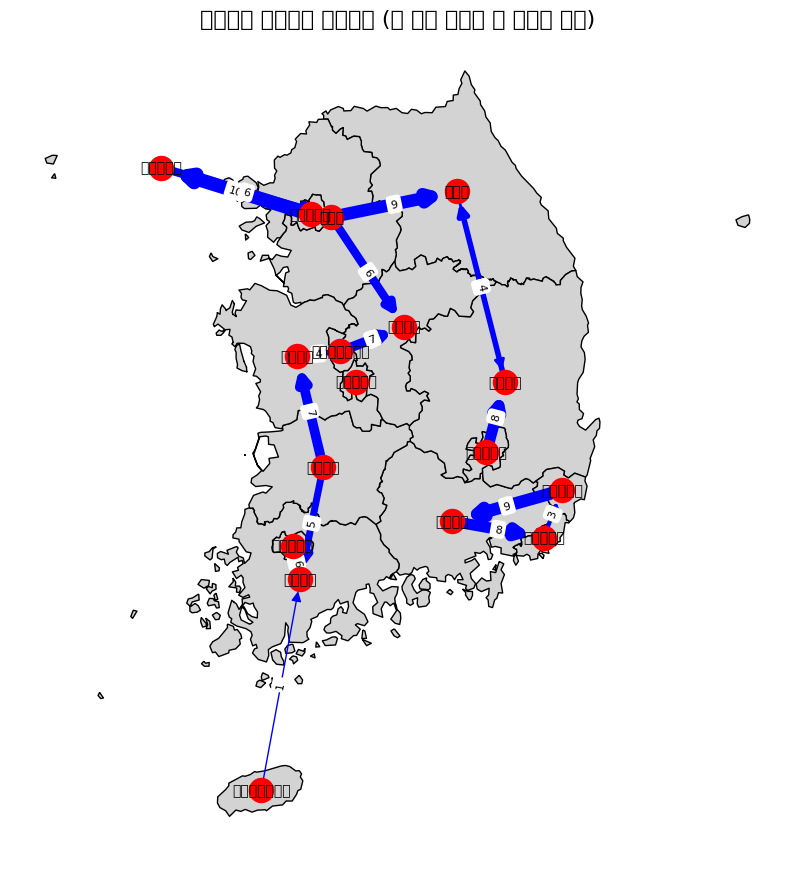

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
edges = [
    ("서울특별시", "인천광역시", {"weight": 10}),   # 서울 -> 인천 (중요도 10)
    ("서울특별시", "경기도", {"weight": 5}),       # 서울 -> 경기 (중요도 5)
    ("부산광역시", "울산광역시", {"weight": 3}),    # 부산 -> 울산 (중요도 3)
    ("대구광역시", "경상북도", {"weight": 8}),     # 대구 -> 경북 (중요도 8)
    ("광주광역시", "전라남도", {"weight": 6}),    # 광주 -> 전남 (중요도 6)
    ("세종특별자치시", "충청북도", {"weight": 7}),  # 세종 -> 충북 (중요도 7)
    ("세종특별자치시", "충청남도", {"weight": 4}),  # 세종 -> 충남 (중요도 4)
    ("경기도", "강원도", {"weight": 9}),         # 경기 -> 강원 (중요도 9)
    ("경기도", "충청북도", {"weight": 6}),       # 경기 -> 충북 (중요도 6)
    ("강원도", "경상북도", {"weight": 2}),       # 강원 -> 경북 (중요도 2)
    ("전라북도", "전라남도", {"weight": 5}),      # 전북 -> 전남 (중요도 5)
    ("전라북도", "충청남도", {"weight": 7}),       # 전북 -> 충남 (중요도 7)
    ("제주특별자치도", "전라남도", {"weight": 1}), # 제주 -> 전남 (중요도 1)
    ("인천광역시", "경기도", {"weight": 6}),        # 인천 -> 경기 (중요도 6)
    ("울산광역시", "경상남도", {"weight": 9}),      # 울산 -> 경남 (중요도 9)
    ("경상남도", "부산광역시", {"weight": 8}),     # 경남 -> 부산 (중요도 8)
    ("경상북도", "강원도", {"weight": 4})        # 경북 -> 강원 (중요도 4)
]

# 간선 추가 (가중치 포함)
G.add_edges_from(edges)

# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")

# 간선 가중치를 기반으로 시각화하기
edge_weights = nx.get_edge_attributes(G, 'weight')

# 간선의 두께를 가중치에 따라 설정
edges_thickness = [edge_weights[edge] for edge in G.edges()]

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=300,
    node_color="red",
    edge_color="blue",
    font_size=10,
    font_color="black",
    arrowsize=15,  # 화살표 크기 설정
    width=edges_thickness  # 가중치에 따른 간선 두께 설정
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("대한민국 광역시도 네트워크 (한 방향 화살표 및 가중치 포함)", fontsize=16)

# 시각화
plt.show()


<ipython-input-50-8e723ce7fe0c>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-50-8e723ce7fe0c>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48124

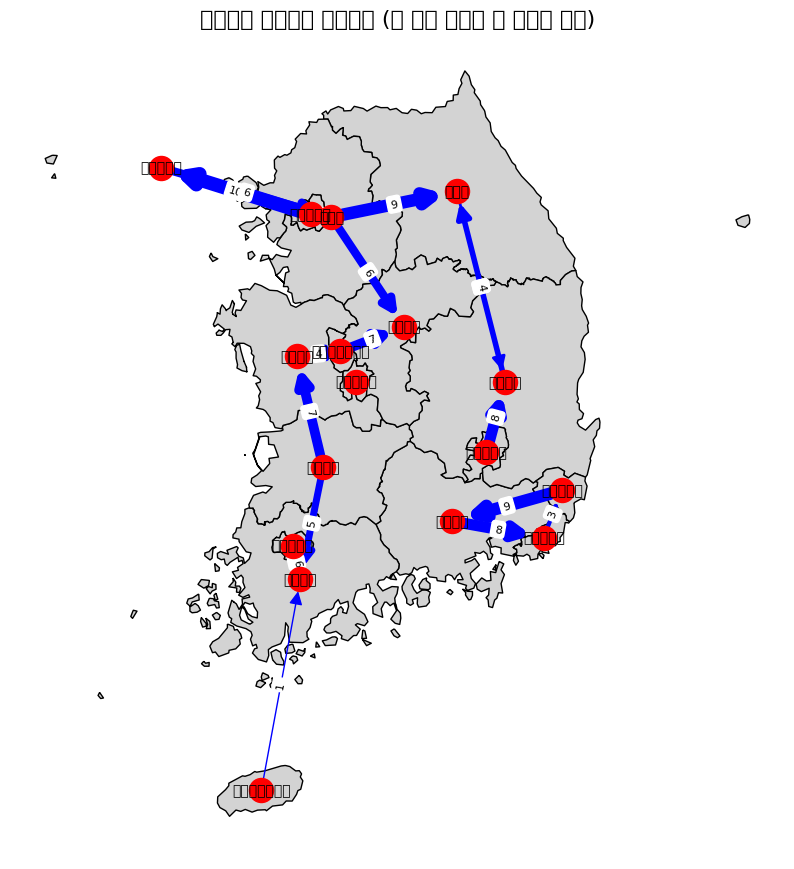

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

# 한글 폰트 설정 (한글 폰트를 사용하도록 설정)
rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우, Malgun Gothic을 사용
# rcParams['font.family'] = 'AppleGothic'  # macOS의 경우, AppleGothic을 사용
# rcParams['font.family'] = 'NanumGothic'  # 리눅스의 경우, NanumGothic을 사용할 수 있음

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
edges = [
    ("서울특별시", "인천광역시", {"weight": 10}),   # 서울 -> 인천 (중요도 10)
    ("서울특별시", "경기도", {"weight": 5}),       # 서울 -> 경기 (중요도 5)
    ("부산광역시", "울산광역시", {"weight": 3}),    # 부산 -> 울산 (중요도 3)
    ("대구광역시", "경상북도", {"weight": 8}),     # 대구 -> 경북 (중요도 8)
    ("광주광역시", "전라남도", {"weight": 6}),    # 광주 -> 전남 (중요도 6)
    ("세종특별자치시", "충청북도", {"weight": 7}),  # 세종 -> 충북 (중요도 7)
    ("세종특별자치시", "충청남도", {"weight": 4}),  # 세종 -> 충남 (중요도 4)
    ("경기도", "강원도", {"weight": 9}),         # 경기 -> 강원 (중요도 9)
    ("경기도", "충청북도", {"weight": 6}),       # 경기 -> 충북 (중요도 6)
    ("강원도", "경상북도", {"weight": 2}),       # 강원 -> 경북 (중요도 2)
    ("전라북도", "전라남도", {"weight": 5}),      # 전북 -> 전남 (중요도 5)
    ("전라북도", "충청남도", {"weight": 7}),       # 전북 -> 충남 (중요도 7)
    ("제주특별자치도", "전라남도", {"weight": 1}), # 제주 -> 전남 (중요도 1)
    ("인천광역시", "경기도", {"weight": 6}),        # 인천 -> 경기 (중요도 6)
    ("울산광역시", "경상남도", {"weight": 9}),      # 울산 -> 경남 (중요도 9)
    ("경상남도", "부산광역시", {"weight": 8}),     # 경남 -> 부산 (중요도 8)
    ("경상북도", "강원도", {"weight": 4})        # 경북 -> 강원 (중요도 4)
]

# 간선 추가 (가중치 포함)
G.add_edges_from(edges)

# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")

# 간선 가중치를 기반으로 시각화하기
edge_weights = nx.get_edge_attributes(G, 'weight')

# 간선의 두께를 가중치에 따라 설정
edges_thickness = [edge_weights[edge] for edge in G.edges()]

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=300,
    node_color="red",
    edge_color="blue",
    font_size=10,
    font_color="black",
    arrowsize=20,  # 화살표 크기 설정
    width=edges_thickness  # 가중치에 따른 간선 두께 설정
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("대한민국 광역시도 네트워크 (한 방향 화살표 및 가중치 포함)", fontsize=16)

# 시각화
plt.show()


<ipython-input-56-36a1d6e4075f>:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-56-36a1d6e4075f>:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48124

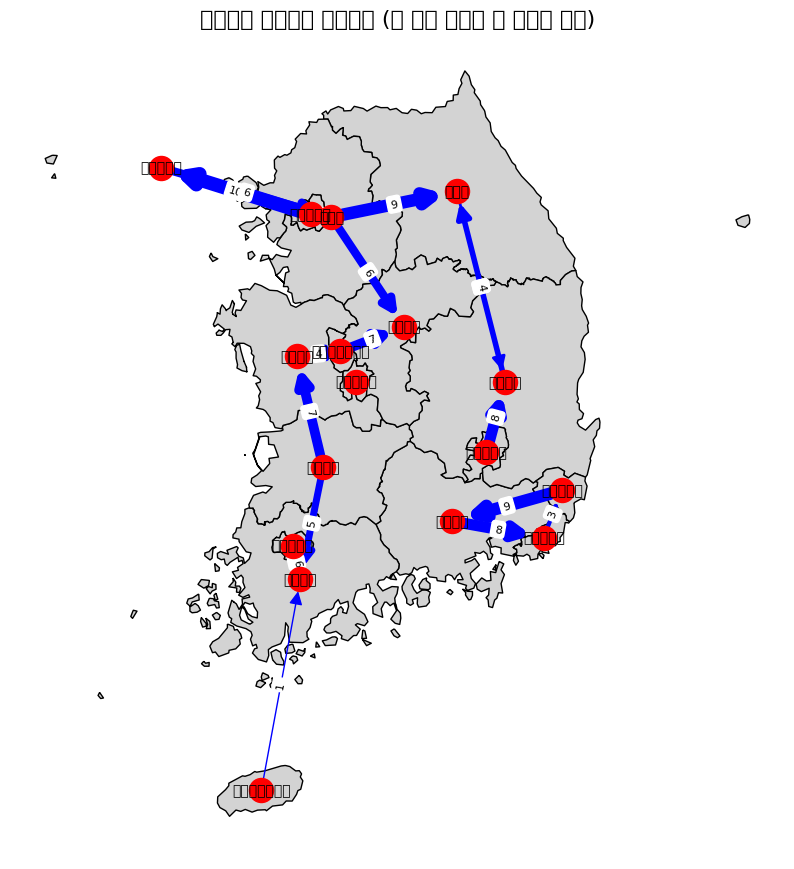

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
import matplotlib.font_manager as fm

# 한글 폰트 설정 (한글 폰트를 사용하도록 설정)
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 리눅스의 경우 (예시)
font_path = "C:/Windows/Fonts/Gill Sans.ttf"  # 윈도우 환경의 경우
# font_path = "/System/Library/Fonts/AppleGothic.ttf"  # macOS 환경의 경우

# 폰트 프로퍼티 설정
prop = fm.FontProperties(fname=font_path)

# rcParams 설정 (폰트 적용)
# rcParams['font.family'] = prop.get_name()

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
edges = [
    ("서울특별시", "인천광역시", {"weight": 10}),
    ("서울특별시", "경기도", {"weight": 5}),
    ("부산광역시", "울산광역시", {"weight": 3}),
    ("대구광역시", "경상북도", {"weight": 8}),
    ("광주광역시", "전라남도", {"weight": 6}),
    ("세종특별자치시", "충청북도", {"weight": 7}),
    ("세종특별자치시", "충청남도", {"weight": 4}),
    ("경기도", "강원도", {"weight": 9}),
    ("경기도", "충청북도", {"weight": 6}),
    ("강원도", "경상북도", {"weight": 2}),
    ("전라북도", "전라남도", {"weight": 5}),
    ("전라북도", "충청남도", {"weight": 7}),
    ("제주특별자치도", "전라남도", {"weight": 1}),
    ("인천광역시", "경기도", {"weight": 6}),
    ("울산광역시", "경상남도", {"weight": 9}),
    ("경상남도", "부산광역시", {"weight": 8}),
    ("경상북도", "강원도", {"weight": 4})
]

# 간선 추가 (가중치 포함)
G.add_edges_from(edges)

# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")

# 간선 가중치를 기반으로 시각화하기
edge_weights = nx.get_edge_attributes(G, 'weight')

# 간선의 두께를 가중치에 따라 설정
edges_thickness = [edge_weights[edge] for edge in G.edges()]

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=300,
    node_color="red",
    edge_color="blue",
    font_size=10,
    font_color="black",
    arrowsize=20,  # 화살표 크기 설정
    width=edges_thickness  # 가중치에 따른 간선 두께 설정
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("대한민국 광역시도 네트워크 (한 방향 화살표 및 가중치 포함)", fontsize=16)
# plt.rc("font", family="Malgun Gothic")

# 시각화
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


<ipython-input-164-aa45de618dd9>:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-164-aa45de618dd9>:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x


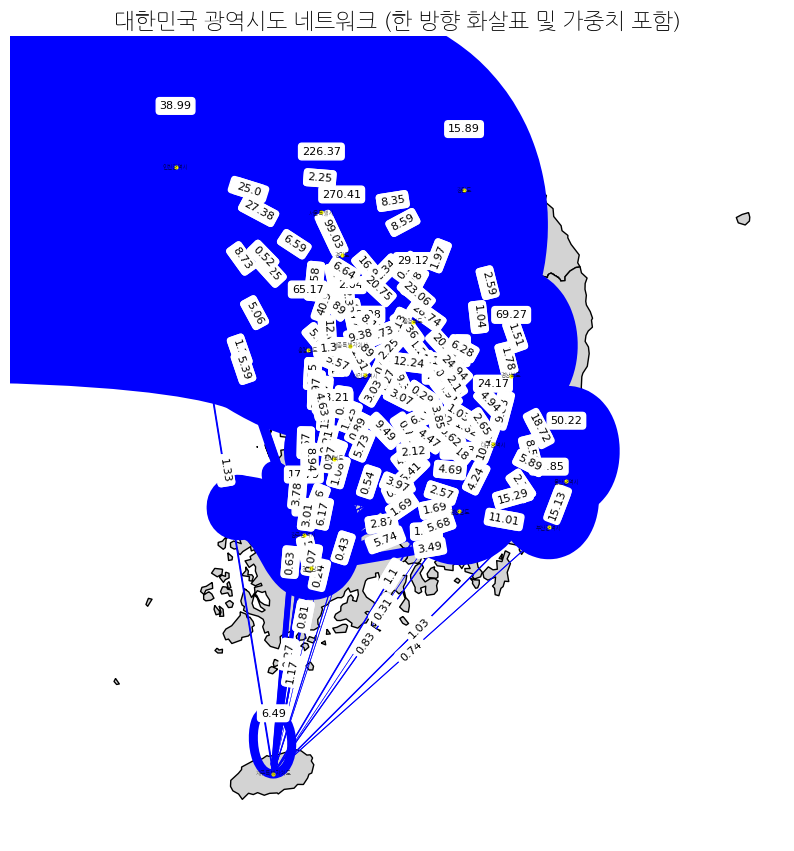

In [164]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

!apt-get -y install fonts-nanum
!apt-get install fonts-nanum* -qq

# 설치된 폰트를 사용하도록 설정
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

# from matplotlib import rc
# font_name = fm.FontProperties(fname="/content/GILSANUB.TTF").get_name()
# rc('font', family=font_name)

# 설치된 폰트 확인
# font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
# font_list

rcParams['font.family'] = 'NanumGothicBold'

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'}) #폰트설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name = '조원_행렬바꿈')
adj_matrix = Hem.iloc[:,1:]
adj_matrix

regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
# edges = [
#     ("서울특별시", "인천광역시", {"weight": 10}),
#     ("서울특별시", "경기도", {"weight": 5}),
#     ("부산광역시", "울산광역시", {"weight": 3}),
#     ("대구광역시", "경상북도", {"weight": 8}),
#     ("광주광역시", "전라남도", {"weight": 6}),
#     ("세종특별자치시", "충청북도", {"weight": 7}),
#     ("세종특별자치시", "충청남도", {"weight": 4}),
#     ("경기도", "강원도", {"weight": 9}),
#     ("경기도", "충청북도", {"weight": 6}),
#     ("강원도", "경상북도", {"weight": 2}),
#     ("전라북도", "전라남도", {"weight": 5}),
#     ("전라북도", "충청남도", {"weight": 7}),
#     ("제주특별자치도", "전라남도", {"weight": 1}),
#     ("인천광역시", "경기도", {"weight": 6}),
#     ("울산광역시", "경상남도", {"weight": 9}),
#     ("경상남도", "부산광역시", {"weight": 8}),
#     ("경상북도", "강원도", {"weight": 4})
# ]



# 간선 추가 (가중치 포함)
# G.add_edges_from(edges)

for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight =adj_matrix.iloc[i, j].round(2)
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)


# 3단계: 간선 두께 설정 (Weight 반영)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # 간선의 가중치
max_weight = max(weights) if weights else 1  # 최대 가중치 (안전성을 위해 1로 초기화)

# 간선 두께 설정 (가중치에 비례)
edge_widths = [2 + (weight / max_weight) * 8 for weight in weights]  # 두께 최소 2, 최대 10


# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")
pos['경기도'] = (127.179937, 37.233463)

# 간선 가중치를 기반으로 시각화하기
edge_weights = nx.get_edge_attributes(G, 'weight')

# 간선의 두께를 가중치에 따라 설정

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=4,
    node_color="yellow",
    edge_color="blue",
    font_size=4,
    font_family='NanumGothicBold',
    font_color="black",
    arrowsize=4,  # 화살표 크기 설정
    width=edges_thickness  # 가중치에 따른 간선 두께 설정
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("대한민국 광역시도 네트워크 (한 방향 화살표 및 가중치 포함)", fontsize=16)

# 시각화
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


<ipython-input-168-280e91833bfd>:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-168-280e91833bfd>:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x


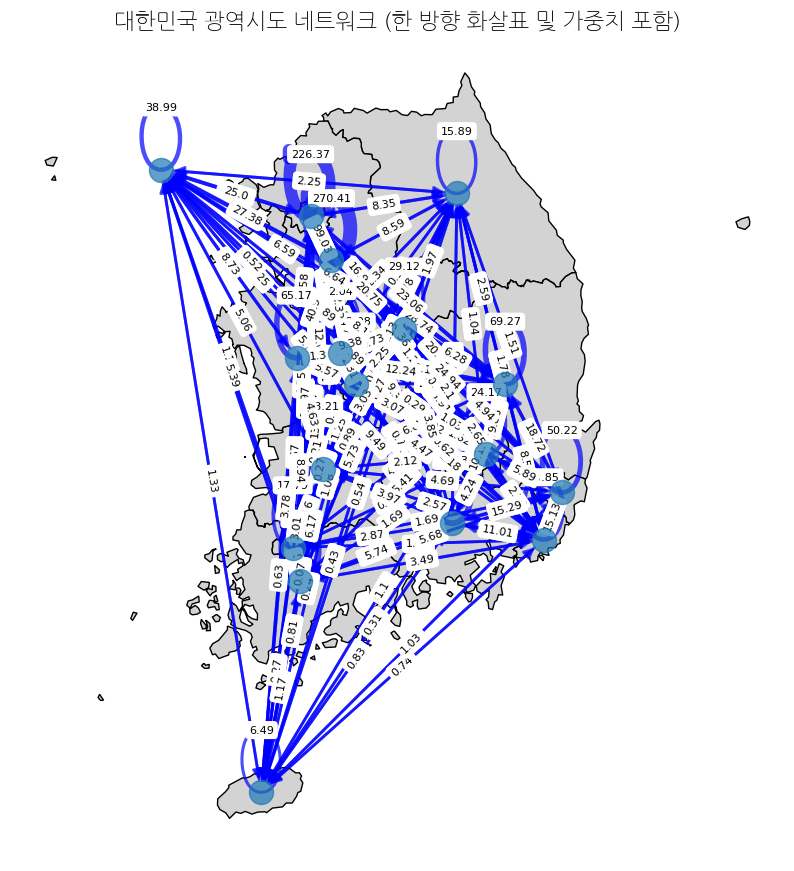

In [168]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

!apt-get -y install fonts-nanum
!apt-get install fonts-nanum* -qq

# 설치된 폰트를 사용하도록 설정
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

# from matplotlib import rc
# font_name = fm.FontProperties(fname="/content/GILSANUB.TTF").get_name()
# rc('font', family=font_name)

# 설치된 폰트 확인
# font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
# font_list

rcParams['font.family'] = 'NanumGothicBold'

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'}) #폰트설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name = '조원_행렬바꿈')
adj_matrix = Hem.iloc[:,1:]
adj_matrix

regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
# edges = [
#     ("서울특별시", "인천광역시", {"weight": 10}),
#     ("서울특별시", "경기도", {"weight": 5}),
#     ("부산광역시", "울산광역시", {"weight": 3}),
#     ("대구광역시", "경상북도", {"weight": 8}),
#     ("광주광역시", "전라남도", {"weight": 6}),
#     ("세종특별자치시", "충청북도", {"weight": 7}),
#     ("세종특별자치시", "충청남도", {"weight": 4}),
#     ("경기도", "강원도", {"weight": 9}),
#     ("경기도", "충청북도", {"weight": 6}),
#     ("강원도", "경상북도", {"weight": 2}),
#     ("전라북도", "전라남도", {"weight": 5}),
#     ("전라북도", "충청남도", {"weight": 7}),
#     ("제주특별자치도", "전라남도", {"weight": 1}),
#     ("인천광역시", "경기도", {"weight": 6}),
#     ("울산광역시", "경상남도", {"weight": 9}),
#     ("경상남도", "부산광역시", {"weight": 8}),
#     ("경상북도", "강원도", {"weight": 4})
# ]



# 간선 추가 (가중치 포함)
# G.add_edges_from(edges)

for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight =adj_matrix.iloc[i, j].round(2)
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)


# 3단계: 간선 두께 설정 (Weight 반영)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # 간선의 가중치
max_weight = max(weights) if weights else 1  # 최대 가중치 (안전성을 위해 1로 초기화)

# 간선 두께 설정 (가중치에 비례)
edge_widths = [2 + (weight / max_weight) * 8 for weight in weights]  # 두께 최소 2, 최대 10


# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")
pos['경기도'] = (127.179937, 37.233463)

# 간선 가중치를 기반으로 시각화하기
edge_weights = nx.get_edge_attributes(G, 'weight')

# 간선의 두께를 가중치에 따라 설정

# NetworkX 노드와 간선 지도 위에 그리기
# nx.draw(
#     G,
#     pos,
#     ax=ax,
#     with_labels=True,
#     node_size=4,
#     node_color="yellow",
#     edge_color="blue",
#     font_size=4,
#     font_family='NanumGothicBold',
#     font_color="black",
#     arrowsize=4,  # 화살표 크기 설정
#     width=edges_thickness  # 가중치에 따른 간선 두께 설정
# )

nx.draw(
    G, pos, width=edge_widths, edge_color="blue", font_family='NanumGothicBold', alpha=0.7, arrowsize=15
)
# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("대한민국 광역시도 네트워크 (한 방향 화살표 및 가중치 포함)", fontsize=16)

# 시각화
plt.show()


In [84]:
################################################## 서   울  만     ##################################################################

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

!apt-get -y install fonts-nanum
!apt-get install fonts-nanum* -qq

# 설치된 폰트를 사용하도록 설정
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

# from matplotlib import rc
# font_name = fm.FontProperties(fname="/content/GILSANUB.TTF").get_name()
# rc('font', family=font_name)

# 설치된 폰트 확인
# font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
# font_list

rcParams['font.family'] = 'NanumGothicBold'

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'}) #폰트설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name = '조원_행렬바꿈')
adj_matrix = Hem.iloc[:,1:]
adj_matrix

regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
# edges = [
#     ("서울특별시", "인천광역시", {"weight": 10}),
#     ("서울특별시", "경기도", {"weight": 5}),
#     ("부산광역시", "울산광역시", {"weight": 3}),
#     ("대구광역시", "경상북도", {"weight": 8}),
#     ("광주광역시", "전라남도", {"weight": 6}),
#     ("세종특별자치시", "충청북도", {"weight": 7}),
#     ("세종특별자치시", "충청남도", {"weight": 4}),
#     ("경기도", "강원도", {"weight": 9}),
#     ("경기도", "충청북도", {"weight": 6}),
#     ("강원도", "경상북도", {"weight": 2}),
#     ("전라북도", "전라남도", {"weight": 5}),
#     ("전라북도", "충청남도", {"weight": 7}),
#     ("제주특별자치도", "전라남도", {"weight": 1}),
#     ("인천광역시", "경기도", {"weight": 6}),
#     ("울산광역시", "경상남도", {"weight": 9}),
#     ("경상남도", "부산광역시", {"weight": 8}),
#     ("경상북도", "강원도", {"weight": 4})
# ]



# 간선 추가 (가중치 포함)
# G.add_edges_from(edges)

for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight =adj_matrix.iloc[i, j].round(2)
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)


# 3단계: 간선 두께 설정 (Weight 반영)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # 간선의 가중치
max_weight = max(weights) if weights else 1  # 최대 가중치 (안전성을 위해 1로 초기화)

# 간선 두께 설정 (가중치에 비례)
edge_widths = [2 + (weight / max_weight) * 8 for weight in weights]  # 두께 최소 2, 최대 10


# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")
pos['경기도'] = (127.179937, 37.233463)

# 간선 가중치를 기반으로 시각화하기
edge_weights = nx.get_edge_attributes(G, 'weight')

# 간선의 두께를 가중치에 따라 설정

# NetworkX 노드와 간선 지도 위에 그리기
# nx.draw(
#     G,
#     pos,
#     ax=ax,
#     with_labels=True,
#     node_size=4,
#     node_color="yellow",
#     edge_color="blue",
#     font_size=4,
#     font_family='NanumGothicBold',
#     font_color="black",
#     arrowsize=4,  # 화살표 크기 설정
#     width=edges_thickness  # 가중치에 따른 간선 두께 설정
# )

nx.draw(
    G, pos, width=edge_widths, edge_color="blue", font_family='NanumGothicBold', alpha=0.7, arrowsize=15
)
# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("대한민국 광역시도 네트워크 (한 방향 화살표 및 가중치 포함)", fontsize=16)

# 시각화
plt.show()


{'강원도': (128.30063954098628, 37.71857096152608),
 '경기도': (127.17993725703357, 37.53346277135392),
 '경상남도': (128.25868821599502, 35.33180332923828),
 '경상북도': (128.73203245119254, 36.339721947751315),
 '광주광역시': (126.83352509449341, 35.155487306890514),
 '대구광역시': (128.56503453658385, 35.82966653588644),
 '대전광역시': (127.39737103234202, 36.34130699579226),
 '부산광역시': (129.0764652127036, 35.21378222783528),
 '서울특별시': (126.99390273322366, 37.551918745667066),
 '세종특별자치시': (127.2586260559849, 36.56060787785474),
 '울산광역시': (129.23760333489898, 35.55485791539574),
 '인천광역시': (125.65849296384975, 37.890121076585864),
 '전라남도': (126.90198907670617, 34.910656400449824),
 '전라북도': (127.10576393060008, 35.72369725377967),
 '제주특별자치도': (126.55341038677452, 33.384072047486946),
 '충청남도': (126.86855047522727, 36.528437042511605),
 '충청북도': (127.83250721714869, 36.739372537284574)}

In [88]:
pos['경기도']

(127.17993725703357, 37.53346277135392)

In [108]:
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선 추가 (for loop를 통해 동적으로 생성)
edges = []
for i, row_i in gdf.iterrows():
    for j, row_j in gdf.iterrows():
        # 같은 지역을 연결하지 않음 (자기 자신과의 연결은 제외)
        if i != j:
            # 예시로 연결의 가중치를 두 지역의 위도 차이에 기반
            weight = abs(row_i["lat"] - row_j["lat"])  # 가중치: 위도 차이
            edges.append((row_i["CTP_KOR_NM"], row_j["CTP_KOR_NM"], {"weight": weight}))

In [107]:
pd.DataFrame(edges)
edges.to_csv('edges.csv', index=False)

AttributeError: 'list' object has no attribute 'to_csv'

In [111]:
df_edges = pd.DataFrame(edges, columns=['Source', 'Target', 'Attributes'])
df_edges.to_csv('edges.csv', index=False)

In [112]:
import numpy as np

# Source와 Target의 고유한 이름들 추출 (행렬의 행/열로 사용)
nodes = pd.concat([df_edges['Source'], df_edges['Target']]).unique()

# 인덱스와 컬럼을 설정하여 매트릭스를 생성
matrix = pd.DataFrame(0, index=nodes, columns=nodes)

# DataFrame에서 weight 값을 매트릭스로 변환
for _, row in df_edges.iterrows():
    matrix.at[row['Source'], row['Target']] = row['weight']

# 매트릭스를 벡터로 변환 (행렬을 1D 배열로 펼침)
vector = matrix.values.flatten()

# 벡터 결과
vector


KeyError: 'weight'

In [114]:
pairs = []

# 모든 (i, j) 쌍에 대해 가중치 추출
for i in matrix.index:
    for j in matrix.columns:
        weight = matrix.at[i, j]
        if weight > 0:  # 0보다 큰 가중치만 쌍으로 처리
            pairs.append((i, j, weight))

# 결과: 282개쌍을 가진 리스트
pairs

[]

In [115]:
import pandas as pd

# 주어진 Edges 데이터를 DataFrame으로 변환
edges = [
    ('서울특별시', '인천광역시', {'weight': 10}),
    ('서울특별시', '경기도', {'weight': 5}),
    ('부산광역시', '울산광역시', {'weight': 3}),
    ('대구광역시', '경상북도', {'weight': 8}),
    ('광주광역시', '전라남도', {'weight': 6}),
    ('세종특별자치시', '충청북도', {'weight': 7}),
    ('세종특별자치시', '충청남도', {'weight': 4}),
    ('경기도', '강원도', {'weight': 9}),
    ('경기도', '충청북도', {'weight': 6}),
    ('강원도', '경상북도', {'weight': 2}),
    ('전라북도', '전라남도', {'weight': 5}),
    ('전라북도', '충청남도', {'weight': 7}),
    ('제주특별자치도', '전라남도', {'weight': 1}),
    ('인천광역시', '경기도', {'weight': 6}),
    ('울산광역시', '경상남도', {'weight': 9}),
    ('경상남도', '부산광역시', {'weight': 8}),
    ('경상북도', '강원도', {'weight': 4})
]

# DataFrame으로 변환
df_edges = pd.DataFrame(edges, columns=['Source', 'Target', 'Attributes'])
df_edges['weight'] = df_edges['Attributes'].apply(lambda x: x['weight'])
df_edges = df_edges.drop(columns=['Attributes'])

# CSV 파일로 저장
df_edges.to_csv('edges.csv', index=False)


In [116]:
import pandas as pd

# CSV 파일 읽기
df_edges = pd.read_csv('edges.csv')

# for loop를 사용하여 처리
for index, row in df_edges.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['weight']

    # 각 (Source, Target, weight) 출력
    print(f"Source: {source}, Target: {target}, Weight: {weight}")


Source: 서울특별시, Target: 인천광역시, Weight: 10
Source: 서울특별시, Target: 경기도, Weight: 5
Source: 부산광역시, Target: 울산광역시, Weight: 3
Source: 대구광역시, Target: 경상북도, Weight: 8
Source: 광주광역시, Target: 전라남도, Weight: 6
Source: 세종특별자치시, Target: 충청북도, Weight: 7
Source: 세종특별자치시, Target: 충청남도, Weight: 4
Source: 경기도, Target: 강원도, Weight: 9
Source: 경기도, Target: 충청북도, Weight: 6
Source: 강원도, Target: 경상북도, Weight: 2
Source: 전라북도, Target: 전라남도, Weight: 5
Source: 전라북도, Target: 충청남도, Weight: 7
Source: 제주특별자치도, Target: 전라남도, Weight: 1
Source: 인천광역시, Target: 경기도, Weight: 6
Source: 울산광역시, Target: 경상남도, Weight: 9
Source: 경상남도, Target: 부산광역시, Weight: 8
Source: 경상북도, Target: 강원도, Weight: 4


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

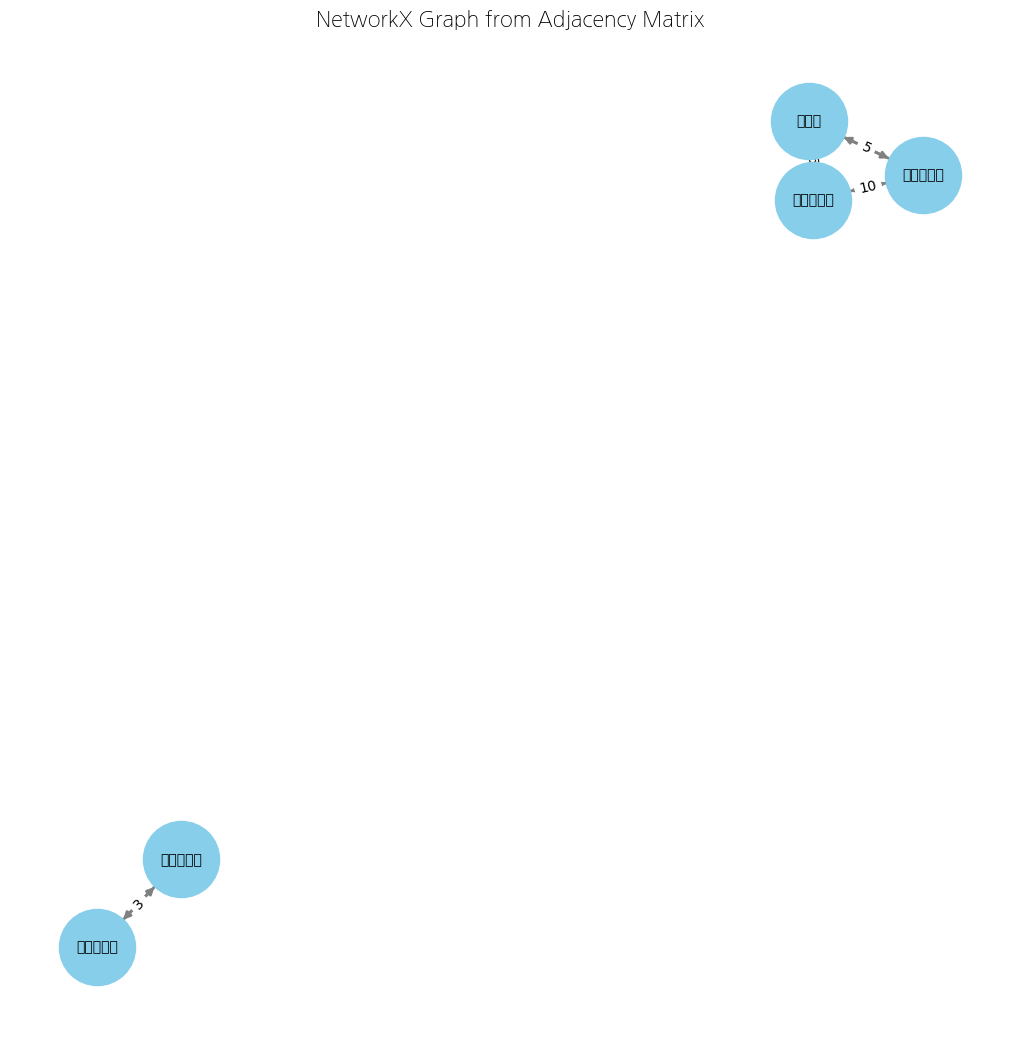

In [117]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1단계: 매트릭스 형태의 Edge 데이터 준비
regions = ['서울특별시', '인천광역시', '경기도', '부산광역시', '울산광역시', '대구광역시']
# 인접 행렬 (행은 Source, 열은 Target, 값은 weight)
adj_matrix = np.array([
    [0, 10, 5, 0, 0, 0],  # 서울특별시
    [10, 0, 6, 0, 0, 0],  # 인천광역시
    [5, 6, 0, 0, 0, 0],   # 경기도
    [0, 0, 0, 0, 3, 0],   # 부산광역시
    [0, 0, 0, 3, 0, 0],   # 울산광역시
    [0, 0, 0, 0, 0, 0]    # 대구광역시
])

# 2단계: networkX 그래프 생성
G = nx.DiGraph()  # 방향성 있는 그래프

# 각 지역 이름과 인덱스 연결 (regions[i]는 adj_matrix[i]에 해당)
for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight = adj_matrix[i, j]
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)

# 3단계: 그래프 시각화
pos = nx.spring_layout(G)  # 노드 배치
plt.figure(figsize=(10, 10))  # 출력 크기 설정
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=2)

# 가중치 레이블을 간선 위에 표시
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# 그래프 표시
plt.title("NetworkX Graph from Adjacency Matrix", size=15)
plt.show()


In [136]:
import openpyxl

# Excel 파일 열기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name = '조원')
adj_matrix = Hem.iloc[:,1:]
adj_matrix

서울         인천          경기         대전        세종         충북  \
0   226.373868  24.996847  129.776736   9.327268  2.509211  16.903731   
1    23.964682  38.993773   39.192683   2.428970  0.705553   6.587307   
2    99.030245  27.376943  270.411262   8.567620  2.324505  20.746667   
3     7.186432   1.248394    6.742970  12.084999  1.314846   2.251684   
4     1.810898   0.515286    2.432847   1.090500  2.042991   0.727949   
5    17.600354   4.871282   24.832630   2.883451  0.830129  29.118107   
6    25.689223   9.193401   46.555733   4.837390  2.434806   9.376677   
7     4.247354   1.115314    6.591176   0.612436  0.210722   0.892393   
8    12.967037   2.681679   11.271217   1.839389  0.725370   3.033993   
9    18.262154   6.593867   31.880344   2.015942  0.646867   5.731005   
10    9.359047   1.893260    8.773312   0.889012  0.290949   2.103182   
11   23.062464   6.639673   37.647328   2.742783  1.098702   6.275582   
12   12.007539   2.890565   14.104197   1.312720  0.615196   2.650163   
13   22.579129   8.129977   30.430886   2.206039  0.976305   4.936267   
14   18.404167   5.764084   27.725689   2.219792  0.698029   3.850876   
15    8.350653   2.253310    8.594724   0.784051  0.339339   1.965222   
16    4.189655   0.611934    2.851711   0.301740  0.080876   0.428006   

           충남         광주         전북         전남         대구         경북  \
0   28.575033   9.879484  12.671388  18.973734  11.543937  28.528007   
1    8.733971   3.305959   5.059417   5.392615   4.150498   8.051924   
2   40.896400  11.370247  11.184069  13.037368  11.287169  28.743791   
3    5.569092   0.914748   1.247010   1.084030   0.867621   2.389161   
4    1.304946   0.237860   0.381510   0.269275   0.278533   0.625510   
5    8.502478   2.214592   2.674529   2.445609   2.757091   6.591223   
6   65.171913   6.258777   6.116700   5.240051   4.556886  12.223521   
7    1.673802  17.786378   2.602525   5.541998   0.737980   1.946642   
8    4.629573   2.301504  28.205911   3.328227   1.982246   4.590602   
9    8.936954   6.486981   6.174283  45.606902   3.713041  11.220705   
10   3.070243   1.099745   2.121395   1.692324  24.170064  14.539427   
11  12.238206   4.078703   6.862177   5.412483   9.881747  69.265042   
12   4.465726   1.654351   2.565452   3.489489   2.690585   5.707056   
13  11.824479   2.459587   4.685742   5.680179   5.062694  13.503844   
14   9.492429   2.865431   3.970279   5.739107   4.240706  10.145537   
15   2.340189   0.610456   1.126730   1.269842   1.044270   2.590359   
16   0.627663   0.355625   0.675237   0.926372   0.400436   0.639702   

           부산         울산         경남         강원        제주  
0   18.301879  20.730398  28.666504   9.653989  3.781302  
1    4.383770   5.198531   7.735454   3.772683  1.328219  
2   16.909351  24.940304  29.392979   8.923012  3.010945  
3    1.181029   1.619254   1.845771   0.676380  0.238787  
4    0.427835   1.029115   0.472568   0.199835  0.070301  
5    3.723778   4.958866   5.039543   1.852285  0.785554  
6    6.583480  10.793087  13.615575   3.118903  1.038088  
7    1.068672   1.686238   2.009116   0.436663  0.268371  
8    2.640926   2.622864   3.666865   1.568424  0.814846  
9    6.604503   7.971873  10.967960   2.220294  1.169170  
10   2.789561   5.891441   6.049995   0.794903  0.314464  
11   8.588410  18.716997  16.006459   3.074126  1.104187  
12  45.850116  15.125242  22.697081   1.528519  0.742252  
13   8.971521  50.218447  14.887434   2.384946  1.030434  
14  11.009928  15.287204  77.134895   2.291500  0.834728  
15   1.777623   1.506987   2.296869  15.894328  0.544691  
16   0.623500   0.532319   0.761000   0.289995  6.491267

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

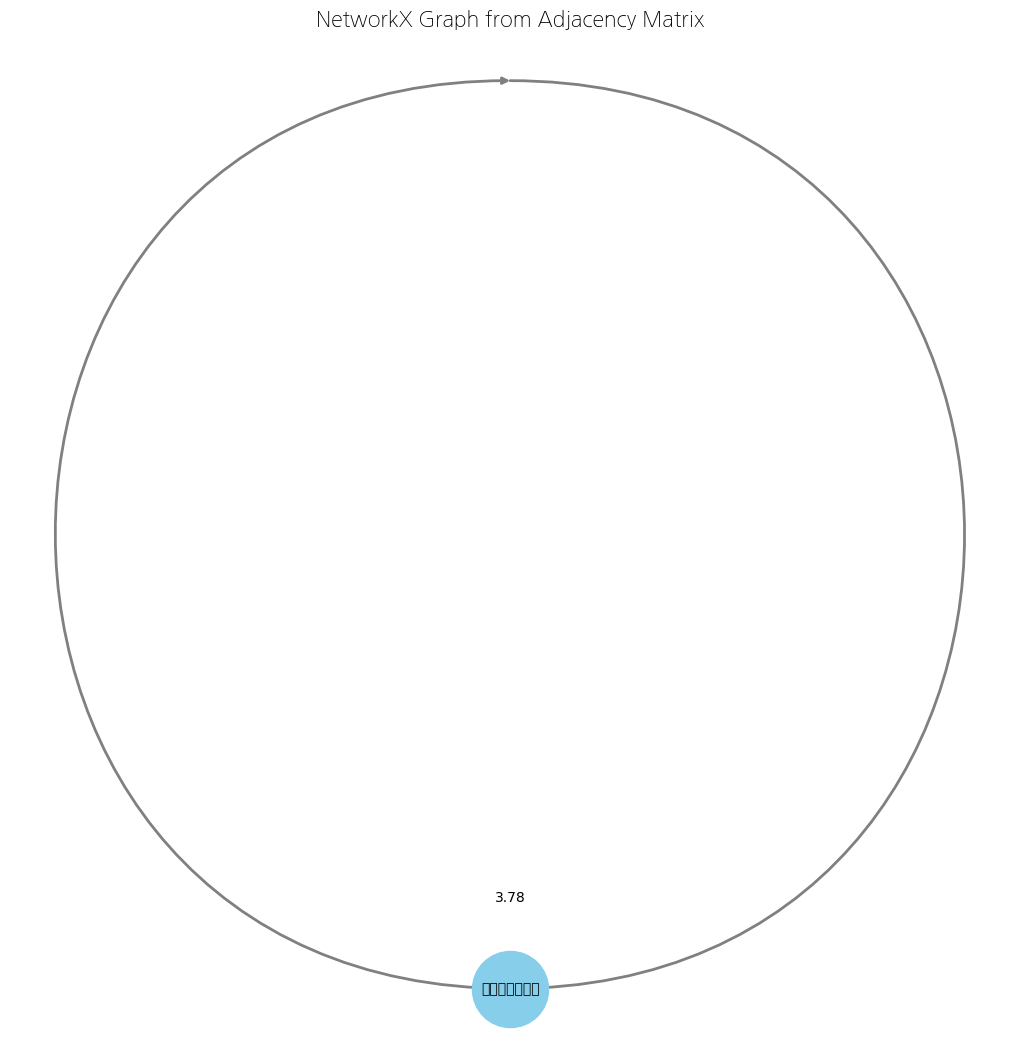

In [176]:
# import numpy as np
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt

# # 1단계: 매트릭스 형태의 Edge 데이터 준비
# regions = ['서울특별시', '인천광역시', '경기도', '부산광역시', '울산광역시', '대구광역시']
regions = adj_matrix.columns
# # 인접 행렬 (행은 Source, 열은 Target, 값은 weight)
# adj_matrix = np.array([
#     [0, 10, 5, 0, 0, 0],  # 서울특별시
#     [10, 0, 6, 0, 0, 0],  # 인천광역시
#     [5, 6, 0, 0, 0, 0],   # 경기도
#     [0, 0, 0, 0, 3, 0],   # 부산광역시
#     [0, 0, 0, 3, 0, 0],   # 울산광역시
#     [0, 0, 0, 0, 0, 0]    # 대구광역시
# ])

# 2단계: networkX 그래프 생성
G = nx.DiGraph()  # 방향성 있는 그래프

# 각 지역 이름과 인덱스 연결 (regions[i]는 adj_matrix[i]에 해당)
for i in range(0,17):
  weight =adj_matrix.iloc[i, 0].round(2)
  if weight > 0:
    G.add_edge(source, target, weight=weight)

           # 3단계: 그래프 시각화
pos = nx.spring_layout(G)  # 노드 배치
plt.figure(figsize=(10, 10))  # 출력 크기 설정
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=2)

# 가중치 레이블을 간선 위에 표시
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# 그래프 표시
plt.title("NetworkX Graph from Adjacency Matrix", size=15)
plt.show()


In [175]:
G

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


<ipython-input-24-8eccd8a6e959>:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-24-8eccd8a6e959>:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x


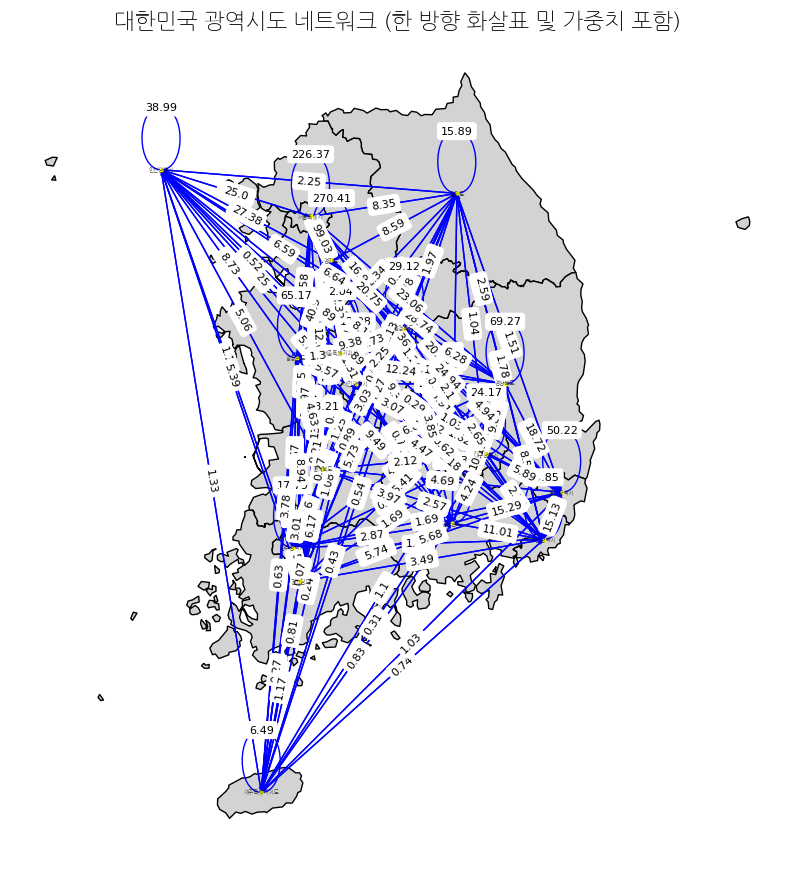

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

!apt-get -y install fonts-nanum
!apt-get install fonts-nanum* -qq

# 설치된 폰트를 사용하도록 설정
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

# from matplotlib import rc
# font_name = fm.FontProperties(fname="/content/GILSANUB.TTF").get_name()
# rc('font', family=font_name)

# 설치된 폰트 확인
# font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
# font_list

rcParams['font.family'] = 'NanumGothicBold'

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'}) #폰트설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name = '조원_행렬바꿈')
adj_matrix = Hem.iloc[:,1:]
adj_matrix

regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
# edges = [
#     ("서울특별시", "인천광역시", {"weight": 10}),
#     ("서울특별시", "경기도", {"weight": 5}),
#     ("부산광역시", "울산광역시", {"weight": 3}),
#     ("대구광역시", "경상북도", {"weight": 8}),
#     ("광주광역시", "전라남도", {"weight": 6}),
#     ("세종특별자치시", "충청북도", {"weight": 7}),
#     ("세종특별자치시", "충청남도", {"weight": 4}),
#     ("경기도", "강원도", {"weight": 9}),
#     ("경기도", "충청북도", {"weight": 6}),
#     ("강원도", "경상북도", {"weight": 2}),
#     ("전라북도", "전라남도", {"weight": 5}),
#     ("전라북도", "충청남도", {"weight": 7}),
#     ("제주특별자치도", "전라남도", {"weight": 1}),
#     ("인천광역시", "경기도", {"weight": 6}),
#     ("울산광역시", "경상남도", {"weight": 9}),
#     ("경상남도", "부산광역시", {"weight": 8}),
#     ("경상북도", "강원도", {"weight": 4})
# ]



# 간선 추가 (가중치 포함)
# G.add_edges_from(edges)

for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight =adj_matrix.iloc[i, j].round(2)
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)


# 3단계: '서울특별시'와 연결된 노드 및 간선만 유지
sub_edges = [
    (u, v, d) for u, v, d in G.edges(data=True)
    if u == '서울특별시' or v == '서울특별시'
]

# '서울특별시'와 연결된 노드 추출
connected_nodes = set([u for u, v, d in sub_edges] + [v for u, v, d in sub_edges])

# 새로운 서브 그래프 생성
subG = G.subgraph(connected_nodes).copy()

# 3단계: 간선 두께 설정 (Weight 반영)
edges = subG.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # 간선의 가중치
max_weight = max(weights) if weights else 1  # 최대 가중치 (안전성을 위해 1로 초기화)

# 간선 두께 설정 (가중치에 비례)
edge_widths = [2 + (weight / max_weight) * 8 for weight in weights]  # 두께 최소 2, 최대 10


# 노드 위치 가져오기
pos = nx.get_node_attributes(subG, "pos")
pos['경기도'] = (127.179937, 37.233463)
pos = nx.get_node_attributes(subG, 'pos')
# 간선 가중치를 기반으로 시각화하기
edge_weights = nx.get_edge_attributes(subG, 'weight')

# 간선의 두께를 가중치에 따라 설정

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    subG,
    pos,
    ax=ax,
    with_labels=True,
    node_size=4,
    node_color="yellow",
    edge_color="blue",
    font_size=4,
    font_family='NanumGothicBold',
    font_color="black",
    arrowsize=4,  # 화살표 크기 설정
    # width=edges_thickness  # 가중치에 따른 간선 두께 설정
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(subG, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(subG, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("대한민국 광역시도 네트워크 (한 방향 화살표 및 가중치 포함)", fontsize=16)

# 시각화
plt.show()


In [27]:
print(subG)

DiGraph with 17 nodes and 289 edges


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


<ipython-input-10-056cded08dd3>:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-10-056cded08dd3>:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x


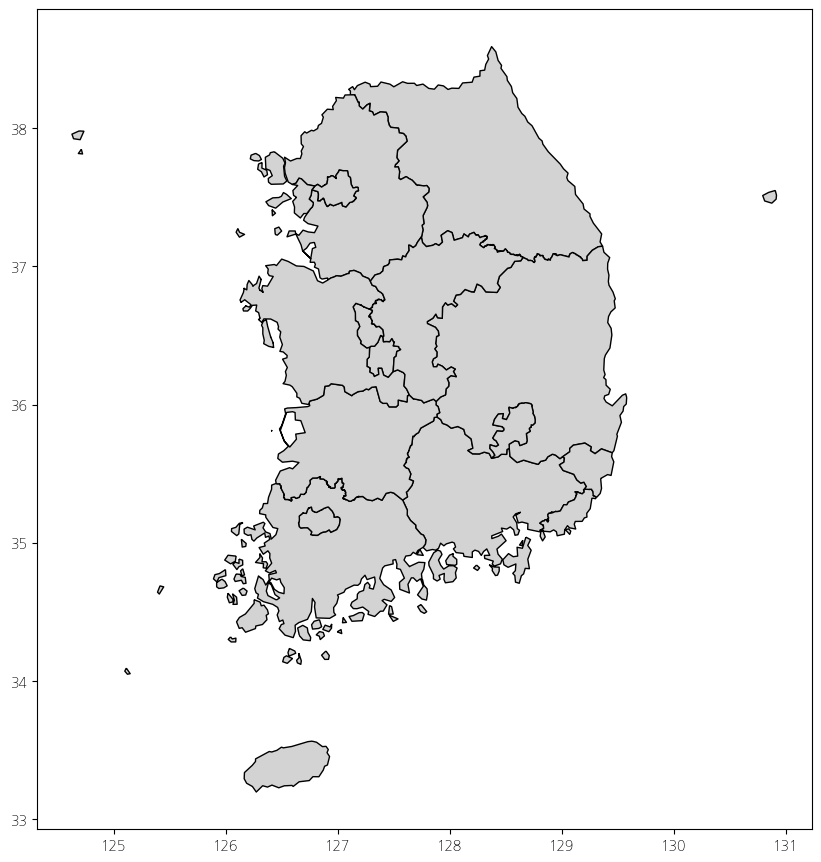

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

!apt-get -y install fonts-nanum
!apt-get install fonts-nanum* -qq

# 설치된 폰트를 사용하도록 설정
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

# from matplotlib import rc
# font_name = fm.FontProperties(fname="/content/GILSANUB.TTF").get_name()
# rc('font', family=font_name)

# 설치된 폰트 확인
# font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
# font_list

rcParams['font.family'] = 'NanumGothicBold'

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'}) #폰트설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name = '조원_행렬바꿈')
adj_matrix = Hem.iloc[:,1:]
adj_matrix

regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
# edges = [
#     ("서울특별시", "인천광역시", {"weight": 10}),
#     ("서울특별시", "경기도", {"weight": 5}),
#     ("부산광역시", "울산광역시", {"weight": 3}),
#     ("대구광역시", "경상북도", {"weight": 8}),
#     ("광주광역시", "전라남도", {"weight": 6}),
#     ("세종특별자치시", "충청북도", {"weight": 7}),
#     ("세종특별자치시", "충청남도", {"weight": 4}),
#     ("경기도", "강원도", {"weight": 9}),
#     ("경기도", "충청북도", {"weight": 6}),
#     ("강원도", "경상북도", {"weight": 2}),
#     ("전라북도", "전라남도", {"weight": 5}),
#     ("전라북도", "충청남도", {"weight": 7}),
#     ("제주특별자치도", "전라남도", {"weight": 1}),
#     ("인천광역시", "경기도", {"weight": 6}),
#     ("울산광역시", "경상남도", {"weight": 9}),
#     ("경상남도", "부산광역시", {"weight": 8}),
#     ("경상북도", "강원도", {"weight": 4})
# ]



# 간선 추가 (가중치 포함)
# G.add_edges_from(edges)

for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight =adj_matrix.iloc[i, j].round(2)
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)


# 3단계: '서울특별시'와 연결된 노드 및 간선만 유지
sub_edges = [
    (u, v, d) for u, v, d in G.edges(data=True)
    if u == '서울특별시' or v == '서울특별시'
]

# '서울특별시'와 연결된 노드 추출
connected_nodes = set([u for u, v, d in sub_edges] + [v for u, v, d in sub_edges])

# 새로운 서브 그래프 생성
subG = G.subgraph(connected_nodes).copy()

# 3단계: 간선 두께 설정 (Weight 반영)
edges = subG.edges(data=True)

In [11]:
edges

OutEdgeDataView([('강원도', '서울특별시', {'weight': 9.65}), ('강원도', '인천광역시', {'weight': 3.77}), ('강원도', '경기도', {'weight': 8.92}), ('강원도', '대전광역시', {'weight': 0.68}), ('강원도', '세종특별자치시', {'weight': 0.2}), ('강원도', '충청북도', {'weight': 1.85}), ('강원도', '충청남도', {'weight': 3.12}), ('강원도', '광주광역시', {'weight': 0.44}), ('강원도', '전라북도', {'weight': 1.57}), ('강원도', '전라남도', {'weight': 2.22}), ('강원도', '대구광역시', {'weight': 0.79}), ('강원도', '경상북도', {'weight': 3.07}), ('강원도', '부산광역시', {'weight': 1.53}), ('강원도', '울산광역시', {'weight': 2.38}), ('강원도', '경상남도', {'weight': 2.29}), ('강원도', '강원도', {'weight': 15.89}), ('강원도', '제주특별자치도', {'weight': 0.29}), ('경기도', '서울특별시', {'weight': 129.78}), ('경기도', '인천광역시', {'weight': 39.19}), ('경기도', '경기도', {'weight': 270.41}), ('경기도', '대전광역시', {'weight': 6.74}), ('경기도', '세종특별자치시', {'weight': 2.43}), ('경기도', '충청북도', {'weight': 24.83}), ('경기도', '충청남도', {'weight': 46.56}), ('경기도', '광주광역시', {'weight': 6.59}), ('경기도', '전라북도', {'weight': 11.27}), ('경기도', '전라남도', {'weight': 31.88}), ('경기도', '대구광

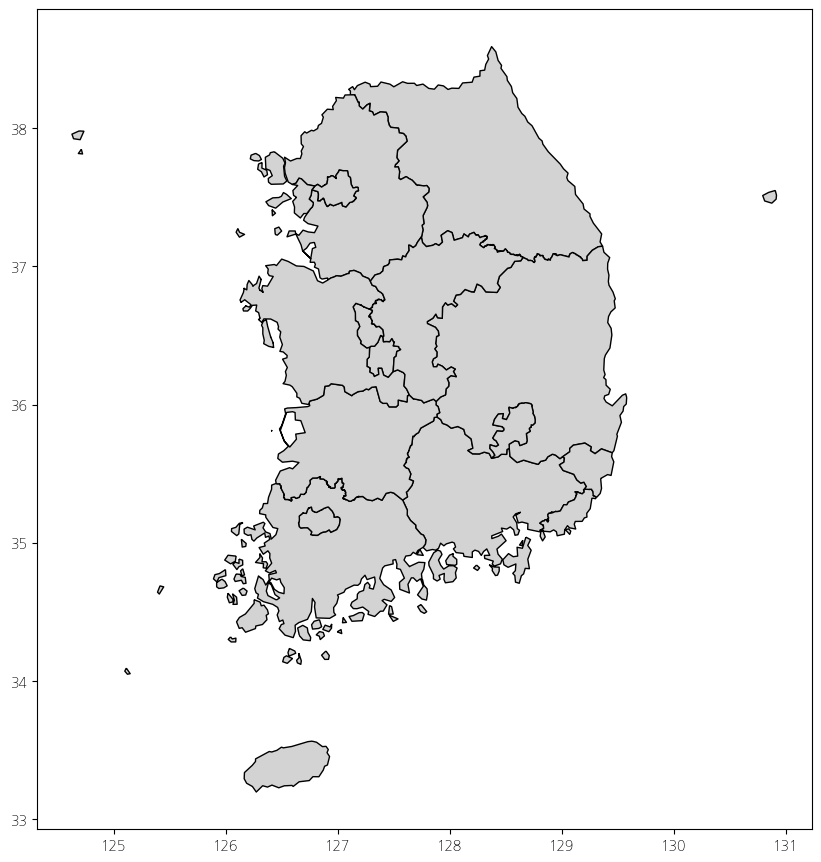

In [13]:
# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name = '조원_행렬바꿈')
adj_matrix = Hem.iloc[:,1:]
adj_matrix

regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
# edges = [
#     ("서울특별시", "인천광역시", {"weight": 10}),
#     ("서울특별시", "경기도", {"weight": 5}),
#     ("부산광역시", "울산광역시", {"weight": 3}),
#     ("대구광역시", "경상북도", {"weight": 8}),
#     ("광주광역시", "전라남도", {"weight": 6}),
#     ("세종특별자치시", "충청북도", {"weight": 7}),
#     ("세종특별자치시", "충청남도", {"weight": 4}),
#     ("경기도", "강원도", {"weight": 9}),
#     ("경기도", "충청북도", {"weight": 6}),
#     ("강원도", "경상북도", {"weight": 2}),
#     ("전라북도", "전라남도", {"weight": 5}),
#     ("전라북도", "충청남도", {"weight": 7}),
#     ("제주특별자치도", "전라남도", {"weight": 1}),
#     ("인천광역시", "경기도", {"weight": 6}),
#     ("울산광역시", "경상남도", {"weight": 9}),
#     ("경상남도", "부산광역시", {"weight": 8}),
#     ("경상북도", "강원도", {"weight": 4})
# ]



# 간선 추가 (가중치 포함)
# G.add_edges_from(edges)

for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight =adj_matrix.iloc[i, j].round(2)
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)


# 3단계: '서울특별시'와 연결된 노드 및 간선만 유지
sub_edges = [
    (u, v, d) for u, v, d in G.edges(data=True)
    if u == '서울특별시' or v == '서울특별시'
]

# '서울특별시'와 연결된 노드 추출
connected_nodes = set([u for u, v, d in sub_edges] + [v for u, v, d in sub_edges])

# 새로운 서브 그래프 생성
subG = G.subgraph(connected_nodes).copy()

In [16]:
sub_edges

[('강원도', '서울특별시', {'weight': 9.65}),
 ('경기도', '서울특별시', {'weight': 129.78}),
 ('경상남도', '서울특별시', {'weight': 28.67}),
 ('경상북도', '서울특별시', {'weight': 28.53}),
 ('광주광역시', '서울특별시', {'weight': 9.88}),
 ('대구광역시', '서울특별시', {'weight': 11.54}),
 ('대전광역시', '서울특별시', {'weight': 9.33}),
 ('부산광역시', '서울특별시', {'weight': 18.3}),
 ('서울특별시', '서울특별시', {'weight': 226.37}),
 ('서울특별시', '인천광역시', {'weight': 23.96}),
 ('서울특별시', '경기도', {'weight': 99.03}),
 ('서울특별시', '대전광역시', {'weight': 7.19}),
 ('서울특별시', '세종특별자치시', {'weight': 1.81}),
 ('서울특별시', '충청북도', {'weight': 17.6}),
 ('서울특별시', '충청남도', {'weight': 25.69}),
 ('서울특별시', '광주광역시', {'weight': 4.25}),
 ('서울특별시', '전라북도', {'weight': 12.97}),
 ('서울특별시', '전라남도', {'weight': 18.26}),
 ('서울특별시', '대구광역시', {'weight': 9.36}),
 ('서울특별시', '경상북도', {'weight': 23.06}),
 ('서울특별시', '부산광역시', {'weight': 12.01}),
 ('서울특별시', '울산광역시', {'weight': 22.58}),
 ('서울특별시', '경상남도', {'weight': 18.4}),
 ('서울특별시', '강원도', {'weight': 8.35}),
 ('서울특별시', '제주특별자치도', {'weight': 4.19}),
 ('세종특별자치시', '서울특별시', 

<ipython-input-20-ee9174b1daac>:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-20-ee9174b1daac>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 460

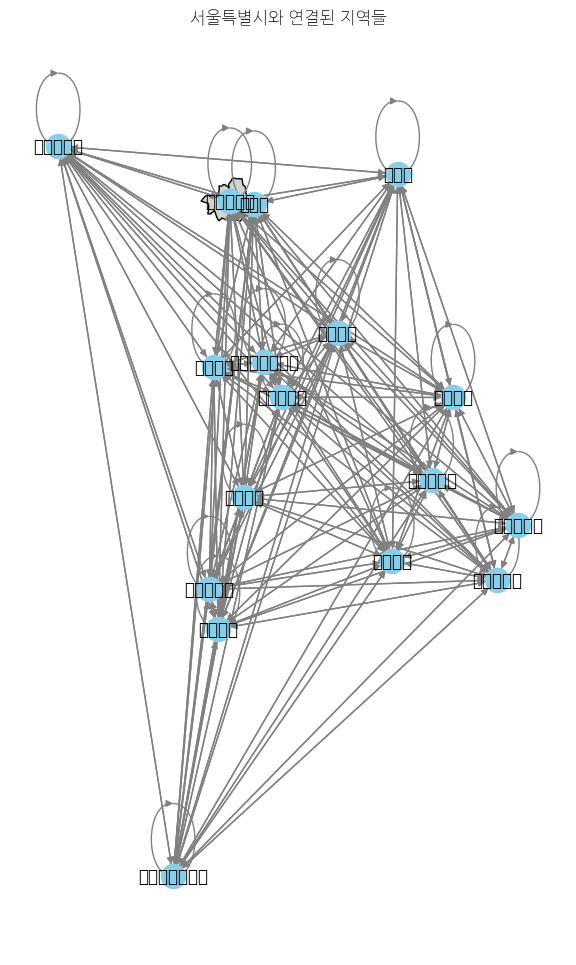

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
import matplotlib.font_manager as fm

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'}) #폰트설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name = '조원_행렬바꿈')
adj_matrix = Hem.iloc[:,1:]
regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선 추가 (가중치 포함)
for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight = adj_matrix.iloc[i, j].round(2)
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)

# '서울특별시'와 연결된 간선만 추출
sub_edges = [
    (u, v, d) for u, v, d in G.edges(data=True)
    if u == '서울특별시' or v == '서울특별시'
]

# '서울특별시'와 연결된 노드 추출
connected_nodes = set([u for u, v, d in sub_edges] + [v for u, v, d in sub_edges])

# 새로운 서브 그래프 생성
subG = G.subgraph(connected_nodes).copy()

# 지도에 서울특별시만 나타내기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# 서울특별시만 포함된 GeoDataFrame을 필터링하여 그리기
seoul_gdf = gdf[gdf["CTP_KOR_NM"] == "서울특별시"]
seoul_gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# NetworkX 그래프에 서울특별시만 포함된 노드와 간선 추가
pos = nx.get_node_attributes(subG, 'pos')
nx.draw(subG, pos, with_labels=True, node_size=300, node_color='skyblue', edge_color='gray', width=1, ax=ax)

plt.title("서울특별시와 연결된 지역들")
plt.show()


<ipython-input-29-27e1428e3939>:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-29-27e1428e3939>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 460

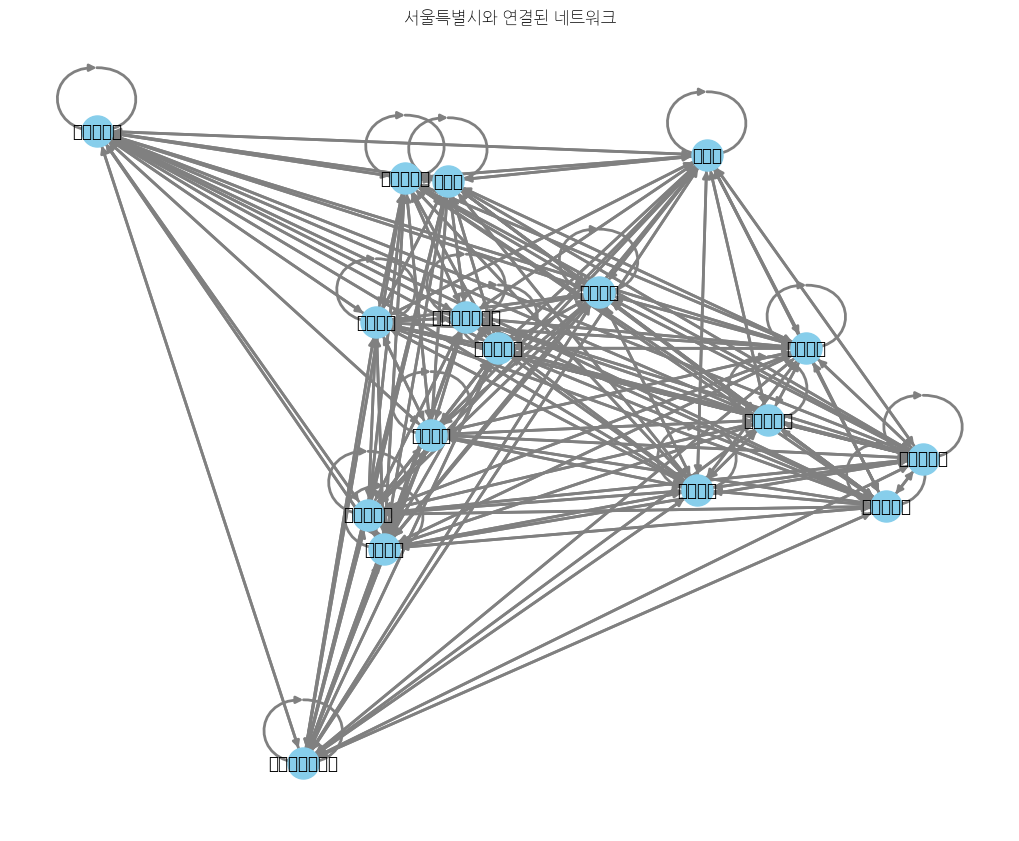

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
import matplotlib.font_manager as fm

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold')  # 폰트 경로 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'})  # 폰트 설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name='조원_행렬바꿈')
adj_matrix = Hem.iloc[:, 1:]
regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선 추가 (가중치 포함)
for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight = adj_matrix.iloc[i, j].round(2)
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)

# '서울특별시'와 연결된 간선만 추출
sub_edges = [
    (u, v, d) for u, v, d in G.edges(data=True)
    if u == '서울특별시' or v == '서울특별시'
]

# '서울특별시'와 연결된 노드 추출
connected_nodes = set([u for u, v, d in sub_edges] + [v for u, v, d in sub_edges])

# 새로운 서브 그래프 생성
subG = G.subgraph(connected_nodes).copy()

#  서울특별시만 포함된 서브 그래프를 그리기 위한 위치 정보 가져오기
pos = nx.get_node_attributes(subG, 'pos')

#  NetworkX 그래프 그리기
plt.figure(figsize=(10, 8))
nx.draw(subG, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=12, font_weight="bold", width=2)

plt.title('서울특별시와 연결된 네트워크')
plt.show()


In [30]:
pos

{'강원도': (128.30063954098628, 37.71857096152608),
 '경기도': (127.17993725703357, 37.53346277135392),
 '경상남도': (128.25868821599502, 35.33180332923828),
 '경상북도': (128.73203245119254, 36.339721947751315),
 '광주광역시': (126.83352509449341, 35.155487306890514),
 '대구광역시': (128.56503453658385, 35.82966653588644),
 '대전광역시': (127.39737103234202, 36.34130699579226),
 '부산광역시': (129.0764652127036, 35.21378222783528),
 '서울특별시': (126.99390273322366, 37.551918745667066),
 '세종특별자치시': (127.2586260559849, 36.56060787785474),
 '울산광역시': (129.23760333489898, 35.55485791539574),
 '인천광역시': (125.65849296384975, 37.890121076585864),
 '전라남도': (126.90198907670617, 34.910656400449824),
 '전라북도': (127.10576393060008, 35.72369725377967),
 '제주특별자치도': (126.55341038677452, 33.384072047486946),
 '충청남도': (126.86855047522727, 36.528437042511605),
 '충청북도': (127.83250721714869, 36.739372537284574)}

In [31]:
connected_nodes

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [32]:
sub_edges

[('강원도', '서울특별시', {'weight': 9.65}),
 ('경기도', '서울특별시', {'weight': 129.78}),
 ('경상남도', '서울특별시', {'weight': 28.67}),
 ('경상북도', '서울특별시', {'weight': 28.53}),
 ('광주광역시', '서울특별시', {'weight': 9.88}),
 ('대구광역시', '서울특별시', {'weight': 11.54}),
 ('대전광역시', '서울특별시', {'weight': 9.33}),
 ('부산광역시', '서울특별시', {'weight': 18.3}),
 ('서울특별시', '서울특별시', {'weight': 226.37}),
 ('서울특별시', '인천광역시', {'weight': 23.96}),
 ('서울특별시', '경기도', {'weight': 99.03}),
 ('서울특별시', '대전광역시', {'weight': 7.19}),
 ('서울특별시', '세종특별자치시', {'weight': 1.81}),
 ('서울특별시', '충청북도', {'weight': 17.6}),
 ('서울특별시', '충청남도', {'weight': 25.69}),
 ('서울특별시', '광주광역시', {'weight': 4.25}),
 ('서울특별시', '전라북도', {'weight': 12.97}),
 ('서울특별시', '전라남도', {'weight': 18.26}),
 ('서울특별시', '대구광역시', {'weight': 9.36}),
 ('서울특별시', '경상북도', {'weight': 23.06}),
 ('서울특별시', '부산광역시', {'weight': 12.01}),
 ('서울특별시', '울산광역시', {'weight': 22.58}),
 ('서울특별시', '경상남도', {'weight': 18.4}),
 ('서울특별시', '강원도', {'weight': 8.35}),
 ('서울특별시', '제주특별자치도', {'weight': 4.19}),
 ('세종특별자치시', '서울특별시', 